<a href="https://www.kaggle.com/mickaelnarboni/seattle-co2-totalghgemissions-2016?scriptVersionId=86709448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mathematical Considerations

In order to define the best predictive model in the frame of our project, we'll use some scoring metrics for each model.
We are using **regression** models to predict our output because we work with continuous data.

The **Mean Squared Error**, **Mean Absolute error**, **Root Mean Squared Error**, and **R-Squared or Coefficient of determination** metrics are used to evaluate the performance of the model in regression analysis.

**Mean Absolute Error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

<div style="width:100%;text-align: center;">
<img align=middle src="https://i.imgur.com/BmBC8VW.jpg" width="350"/>
    
 
**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

<div style="width:100%;text-align: center;">
<img align=middle src="https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/11/Differences-between-MSE-and-RMSE-1-i2tutorials.jpg" width="330"/>
    
 
**Root Mean Squared Error** is the **square root of Mean Squared error**. It measures the standard deviation of residuals.
 
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png" width="300"/>
   

**The coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
    
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/1400/0*8rFYfZJfJZpW2cEV.png" width="440"/>

# Set up Environment

We import all the relevant librairies to display our models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # ignore the warnings about file size
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
from time import process_time

# calling our libraries for our models

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from math import sqrt
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.model_selection import validation_curve
from sklearn import preprocessing
from sklearn.dummy import DummyRegressor


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sea-building-energy-benchmarking/clean_p3 (1).csv
/kaggle/input/sea-building-energy-benchmarking/archive/2016-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2016-building-energy-benchmarking.json
/kaggle/input/sea-building-energy-benchmarking/archive/2015-building-energy-benchmarking.csv
/kaggle/input/sea-building-energy-benchmarking/archive/socrata_metadata_2015-building-energy-benchmarking.json


In [2]:
import pandas as pd
# set option to be able to get each column and row of our dataframes
pd.set_option("display.max_columns", None)
data = pd.read_csv('../input/sea-building-energy-benchmarking/clean_p3 (1).csv',sep='\t', low_memory=False, index_col=[0])
data.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3353,50090,2016,Multifamily MR (5-9),Mid-Rise Multifamily,131910 - LIV Seattle,4717 Brooklyn Ave NE,Seattle,WA,98105.0,8817400110,4,NORTHEAST,47.66366,-122.31450,2015,1.0,7,63825,4850,58975,Multifamily Housing,Multifamily Housing,71241.0,99.0,32.799999,35.000000,78.599998,85.400002,2.337651e+06,2.689826,0.0,4.407752e+05,1503925.0,8337.259766,833726.0,False,Compliant,54.76,0.86
3354,50092,2016,Multifamily MR (5-9),Residence Hall,Terry Hall & Maple Hall,1101 NE Campus Pkwy,Seattle,WA,98195.0,1142002345,4,NORTHEAST,47.65577,-122.31702,2015,1.0,7,325000,0,325000,Residence Hall/Dormitory,Residence Hall/Dormitory,325000.0,69.0,50.700001,53.599998,109.900002,113.000000,1.646749e+07,2.813833,0.0,2.583406e+06,8814581.0,76529.031250,7652903.0,False,Compliant,467.90,1.44
3355,50093,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Raven Terrace,820 Yesler Way,Seattle,WA,98104.0,9822000080,3,EAST,47.60189,-122.32182,2015,1.0,6,86045,8908,77137,"Multifamily Housing, Other - Public Services, ...",Multifamily Housing,78359.0,84.0,27.100000,27.100000,85.099998,85.099998,2.161240e+06,2.680075,0.0,6.334232e+05,2161240.0,0.000000,0.0,False,Compliant,15.07,0.18
3357,50095,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Broadstone Sky,4745 40th Ave SW,Seattle,WA,98116.0,7579200395,1,SOUTHWEST,47.55976,-122.38320,2015,1.0,7,208136,58818,149318,"Multifamily Housing, Parking",Multifamily Housing,168221.0,100.0,21.100000,21.100000,46.900002,46.900002,3.552185e+06,2.713573,0.0,5.828756e+05,1988772.0,15634.129880,1563413.0,False,Compliant,96.90,0.47
3358,50098,2016,Multifamily LR (1-4),Low-Rise Multifamily,1806,1806 23rd Avenue,Seattle,WA,98122.0,1407300010,3,CENTRAL,47.61791,-122.30230,2014,1.0,4,20246,2580,17666,Multifamily Housing,Multifamily Housing,17666.0,99.0,44.700001,45.000000,106.099998,106.400002,7.898472e+05,2.609067,0.0,1.465200e+05,499926.0,2899.209961,289921.0,False,Compliant,18.88,0.93


# Convert Continuous Variables into Discrete Values

At the difference of LabelEncoder(), **OneHotEncoder()** does not create a hierarchy in the numerical values. In our case, we don't have hierarchy in our modalities, so we'll definitely use this class to convert the string into numerical values. 

We're going to use on the categorical variables that did interest us during the exploratory phase:

- BuildingType
- PrimaryPropertyType
- Neighborhood

In [3]:
enc = data[['BuildingType','PrimaryPropertyType','Neighborhood']]
data = data.drop(columns=['BuildingType','PrimaryPropertyType','Neighborhood'])

In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

# passing our categorical columns (label encoded values)

categorical_features = pd.DataFrame(encoder.fit_transform(enc))

# label the encoded columns with the features of the original variables

categorical_features.columns = encoder.get_feature_names(['BuildingType','PrimaryPropertType','Neighborhood'])

# merge with main dataframe

enc_data = data.join(categorical_features, how="inner")
enc_data

,OSEBuildingID,DataYear,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,1,2016,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,2.761569,2003882.00,1.156514e+06,3946027.0,12764.529300,1276453.0,False,Compliant,249.98,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2016,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,2.771009,0.00,9.504252e+05,3242851.0,51450.816410,5145082.0,False,Compliant,295.86,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2016,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,2.896946,21566554.00,1.451544e+07,49526664.0,14938.000000,1493800.0,False,Compliant,2089.28,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,2016,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,2.757081,2214446.25,8.115253e+05,2768924.0,18112.130860,1811213.0,False,Compliant,286.43,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2016,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,

# Features and Predictive Variable for CO2 Emissions

We import our features in a dataframe called X which will contain all the numerical (discrete) variables that do predict our predictive variable.

As predictive variable to predict the total CO2 emissions of a property in Seattle, we decide to pick *TotalGHGEmissions* that seems the most representative of our real case study, which means that the lower *TotalGHGEmissions* is, the lower the consumption of the building will be.

*TotalGHGEmissions* is contained in our y dataframe for predictions

In [5]:
# Create the dataframe that will contain all our features for modeling

X = pd.concat([enc_data.loc[:,'PropertyGFATotal':'PropertyGFABuilding(s)'],enc_data.loc[:,'LargestPropertyUseTypeGFA':'NaturalGas(kBtu)'],enc_data.loc[:,'GHGEmissionsIntensity':'Neighborhood_SOUTHWEST']],1).copy()
X = pd.DataFrame(X)
X.head()

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,88434,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,2.761569,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103566,15064,88502,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,2.771009,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,956110,196718,759392,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,2.896946,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61320,0,61320,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,2.757081,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175580,62000,113580,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,2.803384,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,2.88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y = enc_data.loc[:,'TotalGHGEmissions']
y = pd.DataFrame(y).astype('int32')

# Correlation Matrix

We re-insert our correlation matrix from our exploratory phase because we notice some overfitting between our test and training datasets while creating the models.

We're working on predicting the variable *TotalGHGEmissions* so we want to define a threshold by which we'll not take in consideration the variables in our X features to not give too many degrees of freedom to our models.

By observing the correlation matrix, we gather the variables that are correlated to our predictive variable with a correlation above 40%.

- PropertyGFATotal
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SiteEnergyUseWN(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- Electricity(kBtu)
- NaturalGas(therms)
- NaturalGas(kBtu)
- GHGEmissionsIntensity

From this list, we also notice that some variables are highly correlated between them such as:

- **PropertyGFATotal**, **PropertyGFABuilding(s)** and **LargestPropertyUseTypeGFA**
- **SiteEnergyUse(kBtu)** and **SiteEnergyUseWN(kBtu)**
- **Electricity(kWh)** and **Electricity(kBtu)**
- **NaturalGas(therms)** and **NaturalGas(kBtu)**

We decide to keep **PropertyGFABuilding(s)** because it get a more accurate description of the building GFA and drop the two other correlated variables.
We decide to keep  **SiteEnergyUseWN(kBtu)** over SiteEnergyUse(kBtu).
We decide to keep the **Electricity(kBtu)** and **NaturalGas(kBtu)** because of there are measured in the same units so we keep a certain homogeneity in our data.

Finally, we decide to drop the following variables that are too coreelated to one another:

- PropertyGFATotal
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- NaturalGas(therms)
- GHGEmissionsIntensity

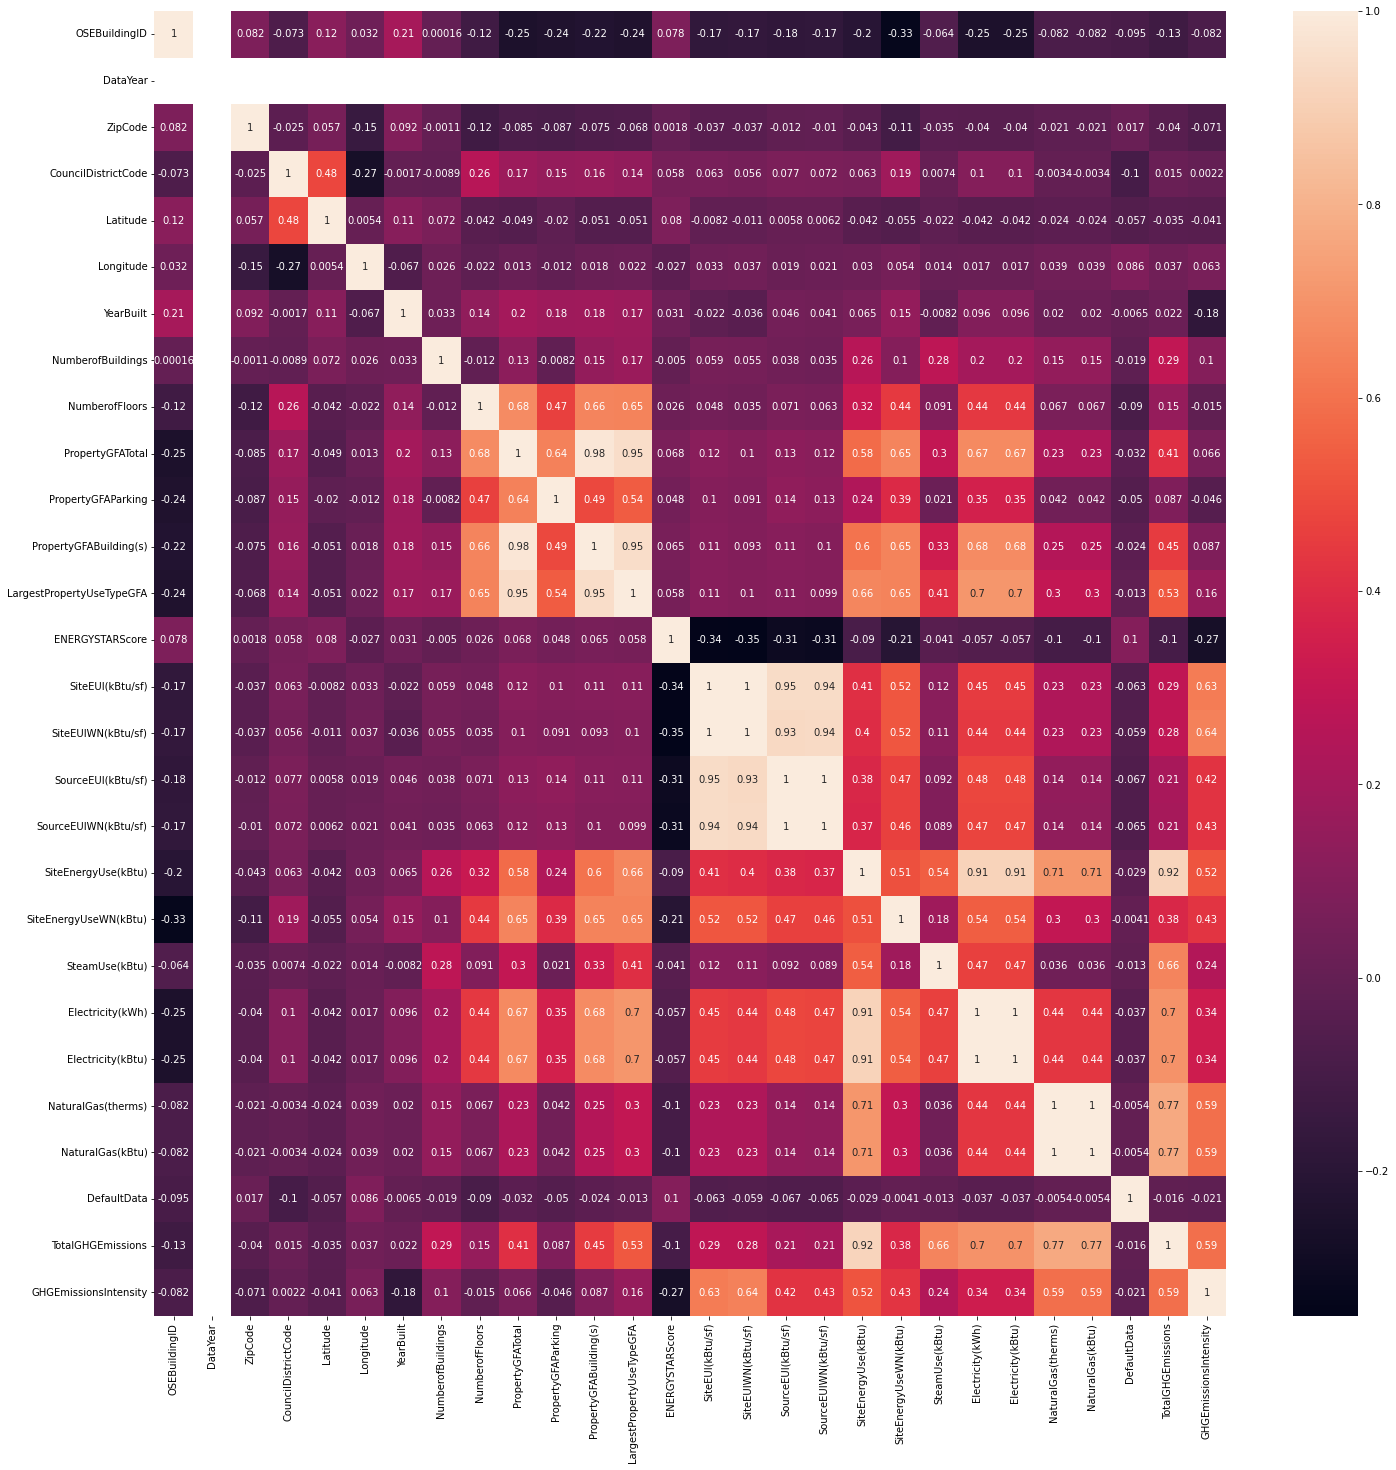

In [7]:
# correlation matrix
fig, ax = plt.subplots(figsize=(24, 24))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
X = X.drop(columns=['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity'])
X.head()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,88434,60.0,81.699997,84.300003,182.500000,189.000000,2.761569,3946027.0,1276453.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,61.0,94.800003,97.900002,176.100006,179.399994,2.771009,3242851.0,5145082.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,43.0,96.000000,97.699997,241.899994,244.100006,2.896946,49526664.0,1493800.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,56.0,110.800003,113.300003,216.199997,224.000000,2.757081,2768924.0,1811213.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62000,113580,75.0,114.800003,118.699997,211.399994,215.600006,2.803384,5368607.0,8803998.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Removing the variables from the consumption bill for our predictions

There are certain variables that we don't want to work with because they depend on existing buildings.
We want to make our predictions for future buildings. 

In [9]:
X = X.drop(columns=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'])
X.head()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,88434,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,61.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,43.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,56.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62000,113580,75.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Notes about Cross Validation

To start creating ML models, we gotta do cross-validation of our data which means dividing our dataset into a training set and a testing set.
To do so, usually, we divide our data into a certain number of blocks, for instance:

- Ten Fold Blocks Cross Validation (10 blocks)
- Four Fold Blocks Cross Validation (4 blocks)

Then we can use our different models (logistic regression, KNN, SVM...) on our training set, compare them and see which one is the most fittable to our data.

- The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

- Kernel is the mathematical function used to define the hyperparameter and it can be: linear, polynomial, rbf for instance.

Generally cross validation is used for two purposes:

- Defining the best hyperparameters for the model

- Test the model on different data points

# Features Importance

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

MDI = Mean Decrease in Impurity 

In [10]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.sort(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance and get the top 10
    fi_df10 = fi_df.nlargest(10, 'feature_importance')[:10]
    fi_df10.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df10['feature_importance'], y=fi_df10['feature_names'])
    
    
    #Add chart labels
    plt.title(model_type +  ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES') 

# Naive Baseline Creation

Using the mean strategy, we create a baseline to compare our ML models


In [11]:
# adding a dummy baseline to our cross-validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_predict_dummy = dummy.predict(X_test)

# dummy statistical metrics

dummy_test_mse = mean_squared_error(y_test, y_predict_dummy)
dummy_test_mae = mean_absolute_error(y_test, y_predict_dummy)
dummy_test_r2 = r2_score(y_test, y_predict_dummy)
dummy_test_rmse = sqrt(mean_squared_error(y_test, y_predict_dummy))

# cross-validation

cv_dummy = cross_val_score(dummy, X_test, y_predict_dummy, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')

# Linear Regression (Ridge)

In [12]:
from sklearn.linear_model import Ridge

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# call the model
ridge = Ridge(random_state = 20)

# hyperparameters
ridge_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_ridge = GridSearchCV(ridge, param_grid = ridge_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_ridge.fit(X_train, y_train)

#Predict the response for test and train datasets
y_ridge_test_pred = g_ridge.predict(X_test)
y_ridge_train_pred = g_ridge.predict(X_train)

# mean error square
ridge_test_mae = mean_absolute_error(y_test, y_ridge_test_pred)
ridge_train_mae = mean_absolute_error(y_train, y_ridge_train_pred)

# best hyperparameter
g_ridge_param = g_ridge.best_params_

# The mean squared error
ridge_test_mse = mean_squared_error(y_test, y_ridge_test_pred)
ridge_train_mse = mean_squared_error(y_train, y_ridge_train_pred)

# The coefficient of determination: 1 is perfect prediction
ridge_test_r2 = r2_score(y_test, y_ridge_test_pred)
ridge_train_r2 = r2_score(y_train, y_ridge_train_pred)

# The root mean squared error
ridge_test_rmse = sqrt(mean_squared_error(y_test, y_ridge_test_pred))
ridge_train_rmse = sqrt(mean_squared_error(y_train, y_ridge_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
ridge_time = t1_stop-t1_start

print("Elapsed time in seconds to run Ridge:", ridge_time) 

Elapsed time in seconds to run Ridge: 1.3050832969999995


In [13]:
import optuna

def objective(trial):

    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    solver = trial.suggest_categorical("solver",choices=["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"])
    
    
    ## Create Model

    optuna_ridge  = Ridge(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, solver=solver)
   
    ## Fit Model
    
    optuna_ridge.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_ridge.predict(X_test))
    

t1_start = process_time()


study10 = optuna.create_study(study_name="RidgeRegression")
study10.optimize(objective, n_trials=47)

# evaluation metrics

optuna_ridge_rmse = sqrt(study10.best_value)
optuna_ridge_mse = study10.best_value
optuna_ridge_params = study10.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
ridge_time = t1_stop-t1_start

print("Elapsed time in seconds to run Ridge Regression with Optuna tuning hyperparameters:", ridge_time)

print("Best Params : {}".format(optuna_ridge_params))
print("\nBest MSE : {}".format(optuna_ridge_mse))
print("\nBest RMSE : {}".format(optuna_ridge_rmse))


[I 2022-02-01 10:53:49,023] A new study created in memory with name: RidgeRegression
[I 2022-02-01 10:53:49,041] Trial 0 finished with value: 88697.0345790457 and parameters: {'fit_intercept': True, 'n_estimators': 905, 'tol': 0.06760059391427647, 'alpha': 234.73291187406875, 'solver': 'auto'}. Best is trial 0 with value: 88697.0345790457.
[I 2022-02-01 10:53:49,057] Trial 1 finished with value: 81250.96075474253 and parameters: {'fit_intercept': True, 'n_estimators': 256, 'tol': 0.3257383748439648, 'alpha': 486.39078867337304, 'solver': 'lsqr'}. Best is trial 1 with value: 81250.96075474253.
[I 2022-02-01 10:53:49,082] Trial 2 finished with value: 84992.84944688909 and parameters: {'fit_intercept': True, 'n_estimators': 245, 'tol': 0.10643616465896122, 'alpha': 524.4556894328016, 'solver': 'saga'}. Best is trial 1 with value: 81250.96075474253.
[I 2022-02-01 10:53:49,098] Trial 3 finished with value: 88323.50992454085 and parameters: {'fit_intercept': True, 'n_estimators': 185, 'tol':

Elapsed time in seconds to run Ridge Regression with Optuna tuning hyperparameters: 6.407031597
Best Params : {'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}

Best MSE : 40048.36000347488

Best RMSE : 200.12086348872992


In [14]:
# cross validation

cv_ridge_train = cross_val_score(g_ridge, X_train, y_ridge_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_ridge_test = cross_val_score(g_ridge, X_test, y_ridge_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_ridge_results = pd.DataFrame([-cv_ridge_train, -cv_ridge_test, -cv_dummy]).transpose()
cv_ridge_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_ridge_results

,Training Dataset,Test Dataset,Dummy
0,0.017650,0.589589,8.077936e-28
1,0.032222,0.303903,8.077936e-28
2,0.022386,0.708148,8.077936e-28
3,0.031928,0.556000,8.077936e-28
4,0.030882,0.344697,8.077936e-28


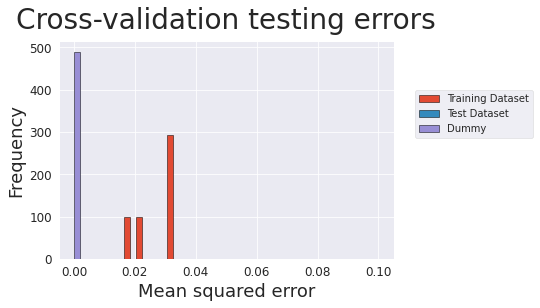

In [15]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.1, num=50)
hist = cv_ridge_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [16]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
ridge_results = pd.DataFrame(['Ridge Regression', ridge_time, g_ridge_param, optuna_ridge_params, ridge_train_mae, ridge_test_mae, dummy_test_mae, ridge_train_mse, ridge_test_mse, optuna_ridge_mse, dummy_test_mse, ridge_train_rmse, ridge_test_rmse, optuna_ridge_rmse, dummy_test_rmse, ridge_train_r2, ridge_test_r2, dummy_test_r2]).transpose()
ridge_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177


# Linear Regression Model (Simple/Least Squares)

More details here: https://realpython.com/linear-regression-in-python/

There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

Simple linear regression is used to estimate the relationship between **two quantitative variables**. 

In [17]:
# We'll start by doing a Linear Regression using one variable to predict our variable TotalGHGEmissions

from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 20)

# start timer
t1_start = process_time()

# call the model
lr = linear_model.LinearRegression()

# train our model
lr.fit(X_train, y_train)

# Predict the response for test and train datasets
y_lr_test_pred = lr.predict(X_test)
y_lr_train_pred = lr.predict(X_train)

# mean error square
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)

# The mean squared error
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)

# The coefficient of determination: 1 is perfect prediction
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# The root mean squared error
lr_test_rmse = sqrt(mean_squared_error(y_test, y_lr_test_pred))
lr_train_rmse = sqrt(mean_squared_error(y_train, y_lr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Least Squares:", lr_time) 

Elapsed time in seconds to run Least Squares: 0.11361483299999975


In [18]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    

    ## Create Model
    
    optuna_lr  = LinearRegression(fit_intercept=fit_intercept)
    
    ## Fit Model
    
    optuna_lr.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_lr.predict(X_test))
    

t1_start = process_time()


study4 = optuna.create_study(study_name="LinearRegression")
study4.optimize(objective, n_trials=47)

# evaluation metrics

optuna_lr_rmse = sqrt(study4.best_value)
optuna_lr_mse = study4.best_value
optuna_lr_params = study4.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
lr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Linear Regression with Optuna tuning hyperparameters:", lr_time)

print("Best Params : {}".format(optuna_lr_params))
print("\nBest MSE : {}".format(optuna_lr_mse))
print("\nBest RMSE : {}".format(optuna_lr_rmse))


[I 2022-02-01 10:53:54,669] A new study created in memory with name: LinearRegression
[I 2022-02-01 10:53:54,684] Trial 0 finished with value: 127603.14156673796 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 127603.14156673796.
[I 2022-02-01 10:53:54,702] Trial 1 finished with value: 127603.14156673796 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 127603.14156673796.
[I 2022-02-01 10:53:54,721] Trial 2 finished with value: 127603.1415667572 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673796.
[I 2022-02-01 10:53:54,739] Trial 3 finished with value: 127603.1415667572 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673796.
[I 2022-02-01 10:53:54,755] Trial 4 finished with value: 127603.1415667572 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673796.
[I 2022-02-01 10:53:54,771] Trial 5 finished with value: 127603.1415667572 and parameters

Elapsed time in seconds to run Linear Regression with Optuna tuning hyperparameters: 3.142833077999999
Best Params : {'fit_intercept': True}

Best MSE : 127603.14156673796

Best RMSE : 357.21581931199233


In [19]:
# cross validation

cv_lr_train = cross_val_score(lr, X_train, y_lr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lr_test = cross_val_score(lr, X_test, y_lr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lr_results = pd.DataFrame([-cv_lr_train, -cv_lr_test, -cv_dummy]).transpose()
cv_lr_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_lr_results

,Training Dataset,Test Dataset,Dummy
0,2.968834e-24,5.719500e-25,8.077936e-28
1,1.503115e-16,1.325144e-24,8.077936e-28
2,5.133464e+01,8.973375e-24,8.077936e-28
3,1.678298e-24,3.875557e+01,8.077936e-28
4,2.388506e-16,9.744388e+01,8.077936e-28


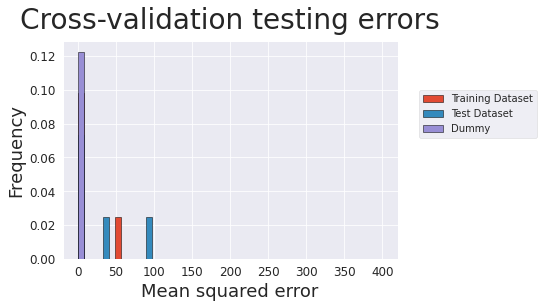

In [20]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=400, num=50)
hist = cv_lr_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [21]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
lr_results = pd.DataFrame(['Least Squares Regression', lr_time, optuna_lr_params, lr_train_mae, lr_test_mae, dummy_test_mae, lr_train_mse, lr_test_mse, optuna_lr_mse, dummy_test_mse, lr_train_rmse, lr_test_rmse, optuna_lr_rmse, dummy_test_rmse, lr_train_r2, lr_test_r2, dummy_test_r2]).transpose()
lr_results.columns = ['Method', 'Elapsed Time', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177
1,Least Squares Regression,3.142833,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177


# Gradient Boosting

We're going to use two cross-validation methods to define our hyperparameters. To define metrics on our training set we'll use GridSearchCV and for our test set, we'll use **Optuna** library.

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
grad_boosting = GradientBoostingRegressor(validation_fraction=0.2, n_iter_no_change=5, tol=0.01) # creation of early stopping to avoid future overfitting in our model

# define values for hyperparameters
learning_rate = [0.6, 0.75, 0.8]
n_estimators = [20]
max_features = [12]
alpha = [0.85]
max_leaf_nodes = [20]
min_samples_leaf = [4]
min_weight_fraction_leaf = [0.39]
max_depth = [7]
min_impurity_decrease = [0.5]

# Create the random grid
gboosting_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_features': max_features, 'alpha': alpha, 'max_leaf_nodes':max_leaf_nodes, 'min_samples_leaf':min_samples_leaf, 'min_weight_fraction_leaf':min_weight_fraction_leaf, 'max_depth':max_depth, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_boosting = GridSearchCV(grad_boosting, param_grid = gboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
grad_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_grad_boosting_test_pred = grad_boosting.predict(X_test)
y_grad_boosting_train_pred = grad_boosting.predict(X_train)

# fit the grid
g_boosting.fit(X_train, y_train)

# best hyperparameter
g_boosting_param = g_boosting.best_params_

# The mean absolute error
grad_boosting_test_mae = mean_absolute_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mae = mean_absolute_error(y_train, y_grad_boosting_train_pred)

# The mean squared error
grad_boosting_test_mse = mean_squared_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mse = mean_squared_error(y_train, y_grad_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
grad_boosting_test_r2 = r2_score(y_test, y_grad_boosting_test_pred)
grad_boosting_train_r2 = r2_score(y_train, y_grad_boosting_train_pred)

# The root mean squared error
grad_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_grad_boosting_test_pred))
grad_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_grad_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
grad_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run Gradient Boosting Regressor:", grad_boosting_time)

Elapsed time in seconds to run Gradient Boosting Regressor: 0.2654911329999976


In [23]:
import optuna

def objective(trial):
    
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    n_estimators = trial.suggest_int("n_estimators", 1, 100)
    max_features = trial.suggest_int("max_features", 1, 20)
    alpha = trial.suggest_float("alpha", 0, 1)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    validation_fraction= trial.suggest_float("validation_fraction", 0.1, 1)
    n_iter_no_change= trial.suggest_int("n_iter_no_change", 0.1, 25)
    tol= trial.suggest_float("tol", 0.1, 10)
    

    ## Create Model
    
    optuna_grad_boosting  = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_features=max_features, alpha=alpha, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, validation_fraction=validation_fraction, n_iter_no_change=n_iter_no_change, tol=tol)
    
    ## Fit Model
    
    optuna_grad_boosting.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_grad_boosting.predict(X_test))
    

t1_start = process_time()


study1 = optuna.create_study(study_name="GradientBoostingRegressor")
study1.optimize(objective, n_trials=47)

# evaluation metrics

optuna_grad_boosting_rmse = sqrt(study1.best_value)
optuna_grad_boosting_mse = study1.best_value
optuna_grad_boosting_params = study1.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
grad_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run Gradient Boosting Regressor with Optuna tuning hyperparameters:", grad_boosting_time)

print("Best Params : {}".format(optuna_grad_boosting_params))
print("\nBest MSE : {}".format(optuna_grad_boosting_mse))
print("\nBest RMSE : {}".format(optuna_grad_boosting_rmse))


[I 2022-02-01 10:53:57,918] A new study created in memory with name: GradientBoostingRegressor
[I 2022-02-01 10:53:57,974] Trial 0 finished with value: 491567.73565370194 and parameters: {'learning_rate': 0.27534201565189353, 'n_estimators': 97, 'max_features': 9, 'alpha': 0.07732081919768252, 'max_leaf_nodes': 11, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.16983742151191528, 'max_depth': 2, 'min_impurity_decrease': 0.6392724098152615, 'validation_fraction': 0.5277048628464066, 'n_iter_no_change': 20, 'tol': 1.558764009503719}. Best is trial 0 with value: 491567.73565370194.
[I 2022-02-01 10:53:57,985] Trial 1 finished with value: 540067.7683277815 and parameters: {'learning_rate': 0.10951258998555191, 'n_estimators': 36, 'max_features': 14, 'alpha': 0.051108366206192524, 'max_leaf_nodes': 24, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.43285032729235934, 'max_depth': 6, 'min_impurity_decrease': 0.2606014621021373, 'validation_fraction': 0.5011744037376418, 'n_iter_n

Elapsed time in seconds to run Gradient Boosting Regressor with Optuna tuning hyperparameters: 2.934163734000002
Best Params : {'learning_rate': 0.43317191221938517, 'n_estimators': 32, 'max_features': 14, 'alpha': 0.05054916625789371, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.027661998062733284, 'max_depth': 7, 'min_impurity_decrease': 0.9203179251219936, 'validation_fraction': 0.43535466015112234, 'n_iter_no_change': 14, 'tol': 9.226632861628731}

Best MSE : 419911.3476348055

Best RMSE : 648.0056694464992


In [24]:
# cross validation

cv_grad_boosting_train = cross_val_score(grad_boosting, X_train, y_grad_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_grad_boosting_test = cross_val_score(grad_boosting, X_test, y_grad_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_grad_boosting_results = pd.DataFrame([-cv_grad_boosting_train, -cv_grad_boosting_test, -cv_dummy]).transpose()
cv_grad_boosting_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_grad_boosting_results

,Training Dataset,Test Dataset,Dummy
0,87.430286,12157.473723,8.077936e-28
1,13845.550132,497284.744944,8.077936e-28
2,108875.080318,179.334128,8.077936e-28
3,130445.962918,765.462303,8.077936e-28
4,348211.769580,3770.308288,8.077936e-28


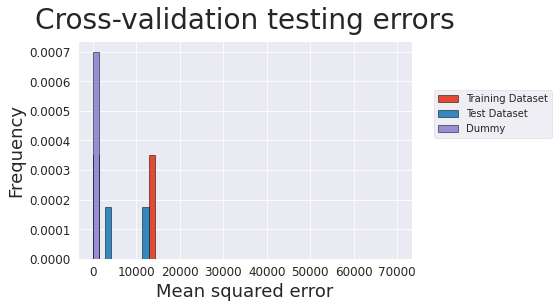

In [25]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=70000, num=50)
hist = cv_grad_boosting_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [26]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
grad_boosting_results = pd.DataFrame(['Gradient Boosting', grad_boosting_time, g_boosting_param, optuna_grad_boosting_params, grad_boosting_train_mae, grad_boosting_test_mae, dummy_test_mae, grad_boosting_train_mse, grad_boosting_test_mse, optuna_grad_boosting_mse, dummy_test_mse, grad_boosting_train_rmse, grad_boosting_test_rmse, optuna_grad_boosting_rmse, dummy_test_rmse, grad_boosting_train_r2, grad_boosting_test_r2, dummy_test_r2]).transpose()
grad_boosting_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177
1,Least Squares Regression,3.142833,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,2.934164,"{'alpha': 0.85, 'learning_rate': 0.8, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.43317191221938517, 'n_estimators': 32, 'max_features': 14, 'alpha': 0.05054916625789371, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.027661998062733284, 'max_depth': 7, 'min_impurity_decrease': 0.9203179251219936, 'validation_fraction': 0.43535466015112234, 'n_iter_no_change': 14, 'tol': 9.226632861628731}",90.193552,125.926398,116.981859,59850.760390,561993.241217,419911.347635,38134.369260,244.644151,749.662085,648.005669,195.280233,0.809483,-0.040617,-0.060177


# Elastic Net

In [27]:
from sklearn.linear_model import ElasticNet

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
elastic_net = ElasticNet()

# hyperparameters
elasticnet_params = {'alpha':(0, 1, 10, 100, 1000, 10000)}

# cross validation to tune hyperparameter
g_elasticnet = GridSearchCV(elastic_net, param_grid = elasticnet_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_elasticnet.fit(X_train, y_train)

#Predict the response for test and train datasets
y_elastic_test_pred = g_elasticnet.predict(X_test)
y_elastic_train_pred = g_elasticnet.predict(X_train)

# mean error square
elastic_test_mae = mean_absolute_error(y_test, y_elastic_test_pred)
elastic_train_mae = mean_absolute_error(y_train, y_elastic_train_pred)

# best hyperparameter
g_elasticnet_param = g_elasticnet.best_params_

# The mean squared error
elastic_test_mse = mean_squared_error(y_test, y_elastic_test_pred)
elastic_train_mse = mean_squared_error(y_train, y_elastic_train_pred)

# The coefficient of determination: 1 is perfect prediction
elastic_test_r2 = r2_score(y_test, y_elastic_test_pred)
elastic_train_r2 = r2_score(y_train, y_elastic_train_pred)

# The root mean squared error
elastic_test_rmse = sqrt(mean_squared_error(y_test, y_elastic_test_pred))
elastic_train_rmse = sqrt(mean_squared_error(y_train, y_elastic_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
elastic_time = t1_stop-t1_start

print("Elapsed time in seconds to run Elastic Net:", elastic_time)

Elapsed time in seconds to run Elastic Net: 3.134340295000001


In [28]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    selection = trial.suggest_categorical("selection",choices=["cyclic","random"])
    l1_ratio = trial.suggest_float("l1_ratio", 0, 1)
    
    

    ## Create Model

    optuna_elastic  = ElasticNet(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, warm_start=warm_start, selection=selection, l1_ratio=l1_ratio)
    
    
    ## Fit Model
    
    optuna_elastic.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_elastic.predict(X_test))
    
t1_start = process_time()


study6 = optuna.create_study(study_name="ElasticNetRegression")
study6.optimize(objective, n_trials=47)

# evaluation metrics

optuna_elastic_rmse = sqrt(study6.best_value)
optuna_elastic_mse = study6.best_value
optuna_elastic_params = study6.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
elastic_time = t1_stop-t1_start

print("Elapsed time in seconds to run Elastic Net Regression with Optuna tuning hyperparameters:", elastic_time)

print("Best Params : {}".format(optuna_elastic_params))
print("\nBest MSE : {}".format(optuna_elastic_mse))
print("\nBest RMSE : {}".format(optuna_elastic_rmse))


[I 2022-02-01 10:54:04,338] A new study created in memory with name: ElasticNetRegression
[I 2022-02-01 10:54:04,356] Trial 0 finished with value: 105291.89675252174 and parameters: {'fit_intercept': True, 'n_estimators': 276, 'tol': 0.17372844662332043, 'alpha': 313.6986575895152, 'warm_start': True, 'selection': 'cyclic', 'l1_ratio': 0.274517049031092}. Best is trial 0 with value: 105291.89675252174.
[I 2022-02-01 10:54:04,374] Trial 1 finished with value: 108446.2524285231 and parameters: {'fit_intercept': False, 'n_estimators': 952, 'tol': 0.05926935746793072, 'alpha': 296.5358018610408, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.6625328491590442}. Best is trial 0 with value: 105291.89675252174.
[I 2022-02-01 10:54:04,396] Trial 2 finished with value: 107975.45803868008 and parameters: {'fit_intercept': False, 'n_estimators': 191, 'tol': 0.23019360357738106, 'alpha': 504.6710723025412, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.9275645865250058}. Best i

Elapsed time in seconds to run Elastic Net Regression with Optuna tuning hyperparameters: 7.665928975
Best Params : {'fit_intercept': False, 'n_estimators': 399, 'tol': 0.425574963510131, 'alpha': 936.2267528740429, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.9565779460121332}

Best MSE : 71288.0357188576

Best RMSE : 266.998194223964


In [29]:
# cross validation

cv_elasticnet_train = cross_val_score(g_elasticnet, X_train, y_elastic_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_elasticnet_test = cross_val_score(g_elasticnet, X_test, y_elastic_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_elasticnet_results = pd.DataFrame([-cv_elasticnet_train, -cv_elasticnet_test, -cv_dummy]).transpose()
cv_elasticnet_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_elasticnet_results

,Training Dataset,Test Dataset,Dummy
0,4.663498e-07,5.219931e-08,8.077936e-28
1,2.257449e-06,3.169657e-07,8.077936e-28
2,9.671810e-08,2.257996e-07,8.077936e-28
3,2.516769e-06,3.517402e-06,8.077936e-28
4,4.276803e-08,9.157608e-07,8.077936e-28


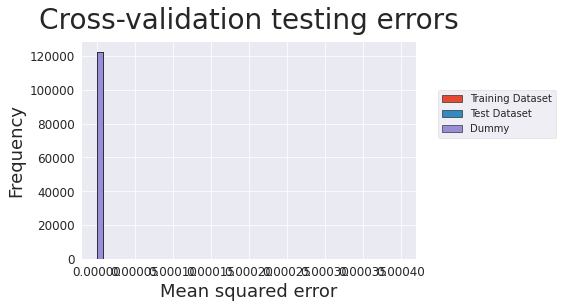

In [30]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.0004, num=50)
hist = cv_elasticnet_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [31]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
elastic_results = pd.DataFrame(['Elastic Net Regression', elastic_time, g_elasticnet_param, optuna_elastic_params, elastic_train_mae, elastic_test_mae, dummy_test_mae, elastic_train_mse, elastic_test_mse, optuna_elastic_mse, dummy_test_mse, elastic_train_rmse, elastic_test_rmse, optuna_elastic_rmse, dummy_test_rmse, elastic_train_r2, elastic_test_r2, dummy_test_r2]).transpose()
elastic_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177
1,Least Squares Regression,3.142833,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,2.934164,"{'alpha': 0.85, 'learning_rate': 0.8, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.43317191221938517, 'n_estimators': 32, 'max_features': 14, 'alpha': 0.05054916625789371, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.027661998062733284, 'max_depth': 7, 'min_impurity_decrease': 0.9203179251219936, 'validation_fraction': 0.43535466015112234, 'n_iter_no_change': 14, 'tol': 9.226632861628731}",90.193552,125.926398,116.981859,59850.760390,561993.241217,419911.347635,38134.369260,244.644151,749.662085,648.005669,195.280233,0.809483,-0.040617,-0.060177
3,Elastic Net Regression,7.665929,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 399, 'tol': 0.425574963510131, 'alpha': 936.2267528740429, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.9565779460121332}",167.956841,141.057650,116.981859,371160.075674,106128.656085,71288.035719,38134.369260,609.229083,325.773934,266.998194,195.280233,0.299669,-1.950492,-0.060177


# Linear Regression (Lasso)

In [32]:
from sklearn.linear_model import Lasso

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
lasso = Lasso()

# hyperparameters
lasso_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_lasso = GridSearchCV(lasso, param_grid = lasso_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_lasso.fit(X_train, y_train)

#Predict the response for test and train datasets
y_lasso_test_pred = g_lasso.predict(X_test)
y_lasso_train_pred = g_lasso.predict(X_train)

# mean error square
lasso_test_mae = mean_absolute_error(y_test, y_lasso_test_pred)
lasso_train_mae = mean_absolute_error(y_train, y_lasso_train_pred)

# best hyperparameter
g_lasso_param = g_lasso.best_params_

# The mean squared error
lasso_test_mse = mean_squared_error(y_test, y_lasso_test_pred)
lasso_train_mse = mean_squared_error(y_train, y_lasso_train_pred)

# The coefficient of determination: 1 is perfect prediction
lasso_test_r2 = r2_score(y_test, y_lasso_test_pred)
lasso_train_r2 = r2_score(y_train, y_lasso_train_pred)

# The root mean squared error
lasso_test_rmse = sqrt(mean_squared_error(y_test, y_lasso_test_pred))
lasso_train_rmse = sqrt(mean_squared_error(y_train, y_lasso_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lasso_time = t1_stop-t1_start

print("Elapsed time in seconds to run Lasso:", lasso_time) 

Elapsed time in seconds to run Lasso: 2.420644241000005


In [33]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    selection = trial.suggest_categorical("selection",choices=["cyclic","random"])
    
    

    ## Create Model
    
    optuna_lasso  = Lasso(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, warm_start=warm_start, selection=selection)
    
    ## Fit Model
    
    optuna_lasso.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_lasso.predict(X_test))
    
t1_start = process_time()


study5 = optuna.create_study(study_name="LassoRegression")
study5.optimize(objective, n_trials=47)

# evaluation metrics

optuna_lasso_rmse = sqrt(study5.best_value)
optuna_lasso_mse = study5.best_value
optuna_lasso_params = study5.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
lasso_time = t1_stop-t1_start

print("Elapsed time in seconds to run Lasso Regression with Optuna tuning hyperparameters:", lasso_time)

print("Best Params : {}".format(optuna_lasso_params))
print("\nBest MSE : {}".format(optuna_lasso_mse))
print("\nBest RMSE : {}".format(optuna_lasso_rmse))


[I 2022-02-01 10:54:13,139] A new study created in memory with name: LassoRegression
[I 2022-02-01 10:54:13,156] Trial 0 finished with value: 79704.79965032882 and parameters: {'fit_intercept': False, 'n_estimators': 342, 'tol': 0.4953086031972811, 'alpha': 145.28537982966594, 'warm_start': False, 'selection': 'random'}. Best is trial 0 with value: 79704.79965032882.
[I 2022-02-01 10:54:13,179] Trial 1 finished with value: 108634.93614495787 and parameters: {'fit_intercept': False, 'n_estimators': 731, 'tol': 0.2160849658798103, 'alpha': 307.362067628685, 'warm_start': False, 'selection': 'random'}. Best is trial 0 with value: 79704.79965032882.
[I 2022-02-01 10:54:13,198] Trial 2 finished with value: 105472.06602925302 and parameters: {'fit_intercept': True, 'n_estimators': 79, 'tol': 0.22155811561772587, 'alpha': 893.1539124146174, 'warm_start': False, 'selection': 'random'}. Best is trial 0 with value: 79704.79965032882.
[I 2022-02-01 10:54:13,217] Trial 3 finished with value: 10522

Elapsed time in seconds to run Lasso Regression with Optuna tuning hyperparameters: 6.469294308000002
Best Params : {'fit_intercept': False, 'n_estimators': 136, 'tol': 0.4658530831086015, 'alpha': 824.807368309807, 'warm_start': True, 'selection': 'random'}

Best MSE : 39123.29784208639

Best RMSE : 197.79610168576727


In [34]:
# cross validation

cv_lasso_train = cross_val_score(g_lasso, X_train, y_lasso_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lasso_test = cross_val_score(g_lasso, X_test, y_lasso_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lasso_results = pd.DataFrame([-cv_lasso_train, -cv_lasso_test, -cv_dummy]).transpose()
cv_lasso_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_lasso_results

,Training Dataset,Test Dataset,Dummy
0,0.001264,0.000074,8.077936e-28
1,0.002403,0.000688,8.077936e-28
2,0.003953,0.000281,8.077936e-28
3,0.003354,0.000026,8.077936e-28
4,0.009141,0.007326,8.077936e-28


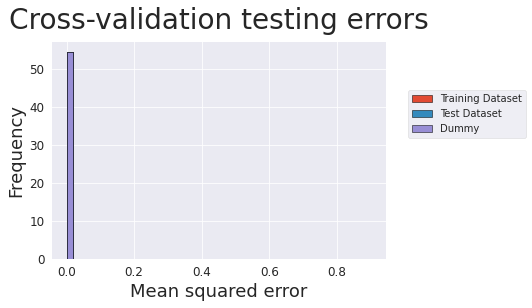

In [35]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.9, num=50)
hist = cv_lasso_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [36]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
lasso_results = pd.DataFrame(['Lasso Regression', lasso_time, g_lasso_param, optuna_lasso_params, lasso_train_mae, lasso_test_mae, dummy_test_mae, lasso_train_mse, lasso_test_mse, optuna_lasso_mse, dummy_test_mse, lasso_train_rmse, lasso_test_rmse, optuna_lasso_rmse, dummy_test_rmse, lasso_train_r2, lasso_test_r2, dummy_test_r2]).transpose()
lasso_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177
1,Least Squares Regression,3.142833,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,2.934164,"{'alpha': 0.85, 'learning_rate': 0.8, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.43317191221938517, 'n_estimators': 32, 'max_features': 14, 'alpha': 0.05054916625789371, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.027661998062733284, 'max_depth': 7, 'min_impurity_decrease': 0.9203179251219936, 'validation_fraction': 0.43535466015112234, 'n_iter_no_change': 14, 'tol': 9.226632861628731}",90.193552,125.926398,116.981859,59850.760390,561993.241217,419911.347635,38134.369260,244.644151,749.662085,648.005669,195.280233,0.809483,-0.040617,-0.060177
3,Elastic Net Regression,7.665929,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 399, 'tol': 0.425574963510131, 'alpha': 936.2267528740429, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.9565779460121332}",167.956841,141.057650,116.981859,371160.075674,106128.656085,71288.035719,38134.369260,609.229083,325.773934,266.998194,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,6.469294,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 136, 'tol': 0.4658530831086015, 'alpha': 824.807368309807, 'warm_start': True, 'selection': 'random'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,39123.297842,38134.369260,607.457675,324.615949,197.796102,195.280233,0.303736,-1.929554,-0.060177


# Decision Trees

In [37]:
from sklearn.tree import DecisionTreeRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# Call the model 
tree = DecisionTreeRegressor()

# define values for hyperparameters
max_features = [20]
max_depth = [7]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [5]
min_impurity_decrease = [0.685]

# Create the random grid
tree_grid = {'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes': max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_tree = GridSearchCV(tree, param_grid = tree_grid, cv=KFold(n_splits=5,shuffle=True))

# Performing training
tree.fit(X_train, y_train)

#Predict the response for test and train datasets
y_tree_test_pred = tree.predict(X_test)
y_tree_train_pred = tree.predict(X_train)

# mean error square
tree_test_mae = mean_absolute_error(y_test, y_tree_test_pred)
tree_train_mae = mean_absolute_error(y_train, y_tree_train_pred)

# fit the grid
g_tree.fit(X_train, y_train)

# best hyperparameter
g_tree_param = g_tree.best_params_

# The mean squared error
tree_test_mse = mean_squared_error(y_test, y_tree_test_pred)
tree_train_mse = mean_squared_error(y_train, y_tree_train_pred)


# The coefficient of determination: 1 is perfect prediction
tree_test_r2 = r2_score(y_test, y_tree_test_pred)
tree_train_r2 = r2_score(y_train, y_tree_train_pred)

# The root mean squared error
tree_test_rmse = sqrt(mean_squared_error(y_test, y_tree_test_pred))
tree_train_rmse = sqrt(mean_squared_error(y_train, y_tree_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
tree_time = t1_stop-t1_start

print("Elapsed time in seconds to run Decision Trees:", tree_time)

Elapsed time in seconds to run Decision Trees: 0.07495716600000435


In [38]:
import optuna

def objective(trial):
    
    
    max_features = trial.suggest_int("max_features", 1, 20)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    splitter= trial.suggest_categorical("splitter",choices=["best", "random"]) 
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20) 
    

    ## Create Model
    
    optuna_tree  = DecisionTreeRegressor(max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, min_samples_split=min_samples_split, splitter=splitter)
    
    ## Fit Model
    
    optuna_tree.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_tree.predict(X_test))
    

t1_start = process_time()


study7 = optuna.create_study(study_name="DecisionTreeRegressor")
study7.optimize(objective, n_trials=47)

# evaluation metrics

optuna_tree_rmse = sqrt(study7.best_value)
optuna_tree_mse = study7.best_value
optuna_tree_params = study7.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
rtree_time = t1_stop-t1_start

print("Elapsed time in seconds to run Decision Tree Regressor with Optuna tuning hyperparameters:", tree_time)

print("Best Params : {}".format(optuna_tree_params))
print("\nBest MSE : {}".format(optuna_tree_mse))
print("\nBest RMSE : {}".format(optuna_tree_rmse))


[I 2022-02-01 10:54:20,001] A new study created in memory with name: DecisionTreeRegressor
[I 2022-02-01 10:54:20,015] Trial 0 finished with value: 38134.36925986053 and parameters: {'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.25659931975534167, 'max_depth': 1, 'min_impurity_decrease': 0.7711842156614465, 'splitter': 'random', 'min_samples_split': 5}. Best is trial 0 with value: 38134.36925986053.
[I 2022-02-01 10:54:20,026] Trial 1 finished with value: 38134.36925986053 and parameters: {'max_features': 13, 'max_leaf_nodes': 20, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.3872782126165572, 'max_depth': 8, 'min_impurity_decrease': 0.2716939956617417, 'splitter': 'random', 'min_samples_split': 7}. Best is trial 0 with value: 38134.36925986053.
[I 2022-02-01 10:54:20,036] Trial 2 finished with value: 40326.98954173454 and parameters: {'max_features': 14, 'max_leaf_nodes': 17, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.04

Elapsed time in seconds to run Decision Tree Regressor with Optuna tuning hyperparameters: 0.07495716600000435
Best Params : {'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.06354648761394321, 'max_depth': 15, 'min_impurity_decrease': 0.6473911785704477, 'splitter': 'best', 'min_samples_split': 7}

Best MSE : 37903.445570766955

Best RMSE : 194.68807249229974


In [39]:
# cross validation

cv_tree_train = cross_val_score(g_tree, X_train, y_tree_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_tree_test = cross_val_score(g_tree, X_test, y_tree_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_tree_results = pd.DataFrame([-cv_tree_train, -cv_tree_test, -cv_dummy]).transpose()
cv_tree_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_tree_results

,Training Dataset,Test Dataset,Dummy
0,3.443125e+04,5.088617e+03,8.077936e-28
1,7.301964e+05,2.215205e+04,8.077936e-28
2,1.117837e+06,1.232696e+06,8.077936e-28
3,4.744872e+05,2.966463e+05,8.077936e-28
4,2.137698e+04,1.429623e+04,8.077936e-28


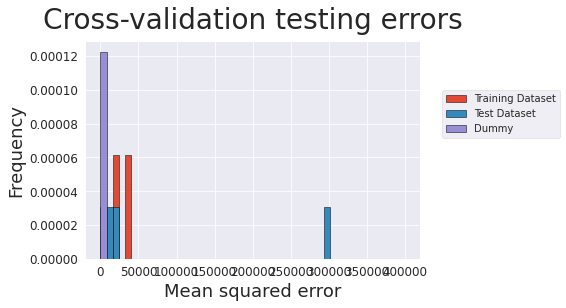

In [40]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=400000, num=50)
hist = cv_tree_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [41]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
tree_results = pd.DataFrame(['Decision Trees Regressor', tree_time, g_tree_param, optuna_tree_params, tree_train_mae, tree_test_mae, dummy_test_mae, tree_train_mse, tree_test_mse, optuna_tree_mse, dummy_test_mse, tree_train_rmse, tree_test_rmse, optuna_tree_rmse, dummy_test_rmse, tree_train_r2, tree_test_r2, dummy_test_r2]).transpose()
tree_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177
1,Least Squares Regression,3.142833,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,2.934164,"{'alpha': 0.85, 'learning_rate': 0.8, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.43317191221938517, 'n_estimators': 32, 'max_features': 14, 'alpha': 0.05054916625789371, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.027661998062733284, 'max_depth': 7, 'min_impurity_decrease': 0.9203179251219936, 'validation_fraction': 0.43535466015112234, 'n_iter_no_change': 14, 'tol': 9.226632861628731}",90.193552,125.926398,116.981859,59850.760390,561993.241217,419911.347635,38134.369260,244.644151,749.662085,648.005669,195.280233,0.809483,-0.040617,-0.060177
3,Elastic Net Regression,7.665929,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 399, 'tol': 0.425574963510131, 'alpha': 936.2267528740429, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.9565779460121332}",167.956841,141.057650,116.981859,371160.075674,106128.656085,71288.035719,38134.369260,609.229083,325.773934,266.998194,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,6.469294,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 136, 'tol': 0.4658530831086015, 'alpha': 824.807368309807, 'warm_start': True, 'selection': 'random'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,39123.297842,38134.369260,607.457675,324.615949,197.796102,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.074957,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.06354648761394321, 'max_depth': 15, 'min_impurity_decrease': 0.6473911785704477, 'splitter': 'best', 'min_samples_split': 7}",0.000000,93.673179,116.981859,0.000000,243817.932504,37903.445571,38134.369260,0.000000,493.779235,194.688072,195.280233,1.000000,-5.778405,-0.060177


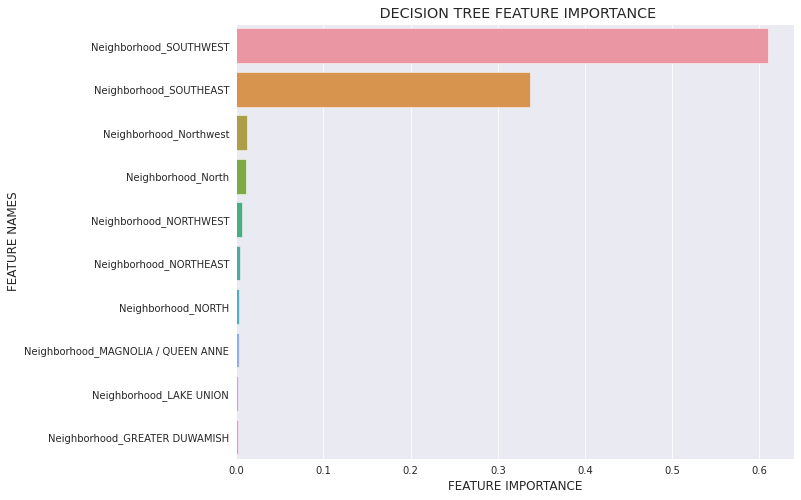

In [42]:
plot_feature_importance(tree.feature_importances_,X.columns,' DECISION TREE')

# Random Forests

In [43]:
# revoir les hyperparamètres de la random forest afin de réduire le temps de run

from sklearn.ensemble import RandomForestRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# create the model
rf = RandomForestRegressor() 

# define values for hyperparameters
n_estimators = [250]
max_features = [10]
max_depth = [8]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [7]
min_impurity_decrease = [0.65]

# Create the random grid
rf_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes':max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_rf = GridSearchCV(rf, param_grid = rf_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model 
rf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_rf_test_pred = rf.predict(X_test)
y_rf_train_pred = rf.predict(X_train)

# fit the grid
g_rf.fit(X_train, y_train)

# best hyperparameter
g_rf_param = g_rf.best_params_

# The mean absolute error
rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)

# The mean squared error
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)

# The coefficient of determination: 1 is perfect prediction
rf_test_r2 = r2_score(y_test, y_rf_test_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# The root mean squared error
rf_test_rmse = sqrt(mean_squared_error(y_test, y_rf_test_pred))
rf_train_rmse = sqrt(mean_squared_error(y_train, y_rf_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rf_time = t1_stop-t1_start

print("Elapsed time in seconds to run Random Forest:", rf_time)

Elapsed time in seconds to run Random Forest: 3.262887613999993


In [44]:
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 100)
    max_features = trial.suggest_int("max_features", 1, 20)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20) 
    max_samples = trial.suggest_int("max_samples", 1, 100)
    bootstrap = trial.suggest_categorical("bootstrap",choices=[True, False]) 
    

    ## Create Model
    
    optuna_rf  = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, min_samples_split=min_samples_split, max_samples=max_samples, bootstrap=bootstrap)
    
    ## Fit Model
    
    optuna_rf.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_rf.predict(X_test))
    

t1_start = process_time()


study2 = optuna.create_study(study_name="RandomForestsRegressor")
study2.optimize(objective, n_trials=47)

# evaluation metrics

optuna_rf_rmse = sqrt(study2.best_value)
optuna_rf_mse = study2.best_value
optuna_rf_params = study2.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
rf_time = t1_stop-t1_start

print("Elapsed time in seconds to run Random Forests Regressor with Optuna tuning hyperparameters:", rf_time)

print("Best Params : {}".format(optuna_rf_params))
print("\nBest MSE : {}".format(optuna_rf_mse))
print("\nBest RMSE : {}".format(optuna_rf_rmse))


[I 2022-02-01 10:54:28,196] A new study created in memory with name: RandomForestsRegressor
[I 2022-02-01 10:54:28,219] Trial 0 finished with value: 37717.07473765254 and parameters: {'n_estimators': 9, 'max_features': 20, 'max_leaf_nodes': 25, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.12049868127699276, 'max_depth': 9, 'min_impurity_decrease': 0.15817083892806394, 'min_samples_split': 7, 'max_samples': 37, 'bootstrap': True}. Best is trial 0 with value: 37717.07473765254.
[I 2022-02-01 10:54:28,297] Trial 1 finished with value: 35432.50266727517 and parameters: {'n_estimators': 46, 'max_features': 12, 'max_leaf_nodes': 5, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.021453635092821277, 'max_depth': 11, 'min_impurity_decrease': 0.8108049838718093, 'min_samples_split': 19, 'max_samples': 84, 'bootstrap': False}. Best is trial 1 with value: 35432.50266727517.
[I 2022-02-01 10:54:28,309] Trial 2 finished with value: 48796.94907782476 and parameters: {'n_estimators': 1, 

Elapsed time in seconds to run Random Forests Regressor with Optuna tuning hyperparameters: 5.015332842999996
Best Params : {'n_estimators': 62, 'max_features': 6, 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.028683301505971787, 'max_depth': 13, 'min_impurity_decrease': 0.05612333190103246, 'min_samples_split': 18, 'max_samples': 49, 'bootstrap': False}

Best MSE : 27475.480871857024

Best RMSE : 165.75729507885023


In [45]:
# cross validation

cv_rf_train = cross_val_score(g_rf, X_train, y_rf_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_rf_test = cross_val_score(g_rf, X_test, y_rf_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_rf_results = pd.DataFrame([-cv_rf_train, -cv_rf_test, -cv_dummy]).transpose()
cv_rf_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_rf_results

,Training Dataset,Test Dataset,Dummy
0,21410.024524,3816.316708,8.077936e-28
1,71136.613044,9342.633362,8.077936e-28
2,230343.468687,19753.932986,8.077936e-28
3,371368.663139,194100.736476,8.077936e-28
4,231741.682944,45355.388980,8.077936e-28


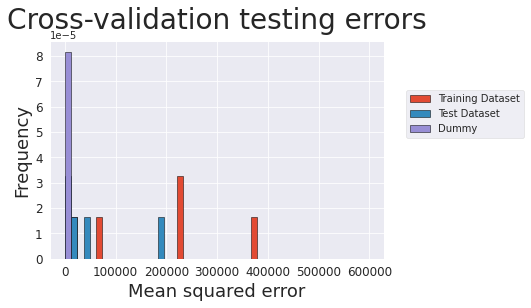

In [46]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=600000, num=50)
hist = cv_rf_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [47]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
rf_results = pd.DataFrame(['Random Forest', rf_time, g_rf_param, optuna_rf_params, rf_train_mae, rf_test_mae, dummy_test_mae, rf_train_mse, rf_test_mse, optuna_rf_mse, dummy_test_mse, rf_train_rmse, rf_test_rmse, optuna_rf_rmse, dummy_test_rmse, rf_train_r2, rf_test_r2, dummy_test_r2]).transpose()
rf_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177
1,Least Squares Regression,3.142833,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,2.934164,"{'alpha': 0.85, 'learning_rate': 0.8, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.43317191221938517, 'n_estimators': 32, 'max_features': 14, 'alpha': 0.05054916625789371, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.027661998062733284, 'max_depth': 7, 'min_impurity_decrease': 0.9203179251219936, 'validation_fraction': 0.43535466015112234, 'n_iter_no_change': 14, 'tol': 9.226632861628731}",90.193552,125.926398,116.981859,59850.760390,561993.241217,419911.347635,38134.369260,244.644151,749.662085,648.005669,195.280233,0.809483,-0.040617,-0.060177
3,Elastic Net Regression,7.665929,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 399, 'tol': 0.425574963510131, 'alpha': 936.2267528740429, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.9565779460121332}",167.956841,141.057650,116.981859,371160.075674,106128.656085,71288.035719,38134.369260,609.229083,325.773934,266.998194,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,6.469294,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 136, 'tol': 0.4658530831086015, 'alpha': 824.807368309807, 'warm_start': True, 'selection': 'random'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,39123.297842,38134.369260,607.457675,324.615949,197.796102,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.074957,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.06354648761394321, 'max_depth': 15, 'min_impurity_decrease': 0.6473911785704477, 'splitter': 'best', 'min_samples_split': 7}",0.000000,93.673179,116.981859,0.000000,243817.932504,37903.445571,38134.369260,0.000000,493.779235,194.688072,195.280233,1.000000,-5.778405,-0.060177
6,Random Forest,5.015333,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 62, 'max_features': 6, 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.028683301505971787, 'max_depth': 13, 'min_impurity_decrease': 0.05612333190103246, 'min_samples_split': 18, 'max_samples': 49, 'bootstrap': False}",45.062128,81.099858,116.981859,68986.121575,69380.836277,27475.480872,38134.369260,262.652092,263.402423,165.757295,195.280233,0.869832,-0.928863,-0.060177


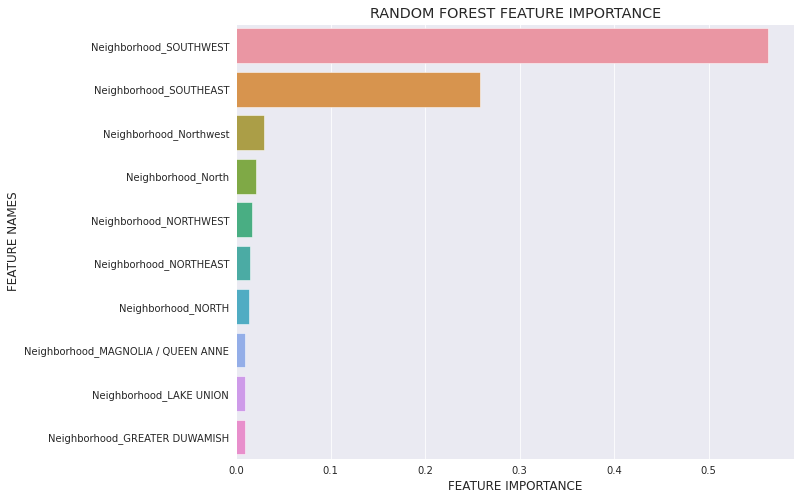

In [48]:
# features importance for random forest
plt.style.use('ggplot')
sns.set_style('darkgrid')
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST')
plt.savefig('rffeatures.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Support Vector Regression

Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. Let’s spend a few minutes understanding the idea behind SVR.



In [49]:
from sklearn.svm import SVR

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

#call the model
svr = SVR()

# define values for hyperparameters
kernel = ['poly']
degree = [1] # linear
C = [200]

# Create the random grid
svr_grid = {'kernel': kernel, 'degree': degree, 'C': C}

# cross validation to tune hyperparameter
gsvr = GridSearchCV(svr, param_grid = svr_grid, cv=KFold(n_splits=5,shuffle=True))

# train our models with the parameters we indicated
gsvr.fit(X_train, y_train)

#Predict the response for test dataset
y_svr_test_pred = gsvr.predict(X_test)
y_svr_train_pred = gsvr.predict(X_train)

# mean error square
svr_test_mae = mean_absolute_error(y_test, y_svr_test_pred)
svr_train_mae = mean_absolute_error(y_train, y_svr_train_pred)

# best hyperparameter
gsvr_param = gsvr.best_params_

# The mean squared error
svr_test_mse = mean_squared_error(y_test, y_svr_test_pred)
svr_train_mse = mean_squared_error(y_train, y_svr_train_pred)

# The coefficient of determination: 1 is perfect prediction
svr_test_r2 = r2_score(y_test, y_svr_test_pred)
svr_train_r2 = r2_score(y_train, y_svr_train_pred)

# The root mean squared error
svr_test_rmse = sqrt(mean_squared_error(y_test, y_svr_test_pred))
svr_train_rmse = sqrt(mean_squared_error(y_train, y_svr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
svr_time = t1_stop-t1_start

print("Elapsed time in seconds to run SVR:", svr_time) 

Elapsed time in seconds to run SVR: 1.162756502999997


In [50]:
import optuna

def objective(trial):

    gamma = trial.suggest_categorical("gamma", choices=["auto", "scale"])
    verbose = trial.suggest_categorical("verbose", choices=[True, False])
    C = trial.suggest_float("C", 1, 100)
    epsilon = trial.suggest_float("epsilon", 0, 1)
    shrinking = trial.suggest_categorical("shrinking",choices=[True,False]) 

    ## Create Model
    
    optuna_svr = SVR(epsilon=epsilon, gamma=gamma, C=C, shrinking=shrinking, verbose=verbose)
    
    ## Fit Model
    
    optuna_svr.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_svr.predict(X_test))
    

t1_start = process_time()


study9 = optuna.create_study(study_name="SupportVectorRegressor")
study9.optimize(objective, n_trials=47)

# evaluation metrics

optuna_svr_rmse = sqrt(study9.best_value)
optuna_svr_mse = study9.best_value
optuna_svr_params = study9.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
svr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Support Vector Regressor with Optuna tuning hyperparameters:", svr_time)

print("Best Params : {}".format(optuna_svr_params))
print("\nBest MSE : {}".format(optuna_svr_mse))
print("\nBest RMSE : {}".format(optuna_svr_rmse))


[I 2022-02-01 10:55:00,144] A new study created in memory with name: SupportVectorRegressor
[I 2022-02-01 10:55:00,417] Trial 0 finished with value: 26571.241741995163 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 87.135218084208, 'epsilon': 0.1302787657540082, 'shrinking': True}. Best is trial 0 with value: 26571.241741995163.


[LibSVM].

[I 2022-02-01 10:55:00,771] Trial 1 finished with value: 37811.59332365532 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 62.276998754471585, 'epsilon': 0.21436360660202658, 'shrinking': True}. Best is trial 0 with value: 26571.241741995163.


.*.*
optimization finished, #iter = 3196
obj = -8407962.617422, rho = -47.035034
nSV = 1304, nBSV = 279
[LibSVM]..*
optimization finished, #iter = 2873
obj = -8343865.314834, rho = -46.951317
nSV = 1304, nBSV = 279


[I 2022-02-01 10:55:01,354] Trial 2 finished with value: 37818.79042303312 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 61.77541297392145, 'epsilon': 0.31812409972641476, 'shrinking': False}. Best is trial 0 with value: 26571.241741995163.
[I 2022-02-01 10:55:01,621] Trial 3 finished with value: 28882.141381810186 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 7.930947345112787, 'epsilon': 0.036833790125348154, 'shrinking': True}. Best is trial 0 with value: 26571.241741995163.
[I 2022-02-01 10:55:01,886] Trial 4 finished with value: 28347.090219912898 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 11.67970667394798, 'epsilon': 0.6538855950715478, 'shrinking': False}. Best is trial 0 with value: 26571.241741995163.


[LibSVM]

[I 2022-02-01 10:55:02,159] Trial 5 finished with value: 26953.962315718716 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 54.413074201814815, 'epsilon': 0.37195366353453074, 'shrinking': False}. Best is trial 0 with value: 26571.241741995163.


*
optimization finished, #iter = 908
obj = -7461998.161487, rho = -397.089198
nSV = 1300, nBSV = 1294
[LibSVM]

[I 2022-02-01 10:55:02,424] Trial 6 finished with value: 32098.322163280158 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 1.6931016682746316, 'epsilon': 0.9368637491231598, 'shrinking': False}. Best is trial 0 with value: 26571.241741995163.


*
optimization finished, #iter = 825
obj = -251822.917415, rho = -130.752136
nSV = 1287, nBSV = 1285
[LibSVM]

[I 2022-02-01 10:55:02,777] Trial 7 finished with value: 37722.34511464826 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 65.14796566432751, 'epsilon': 0.8526477094503473, 'shrinking': True}. Best is trial 0 with value: 26571.241741995163.


..*.*
optimization finished, #iter = 3016
obj = -8714927.558092, rho = -48.090132
nSV = 1304, nBSV = 270
[LibSVM]

[I 2022-02-01 10:55:03,137] Trial 8 finished with value: 37527.402361176595 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 75.07351711531197, 'epsilon': 0.7793143115719157, 'shrinking': False}. Best is trial 0 with value: 26571.241741995163.


..*
optimization finished, #iter = 2772
obj = -9862430.352787, rho = -50.487025
nSV = 1297, nBSV = 247
[LibSVM]

[I 2022-02-01 10:55:03,411] Trial 9 finished with value: 39011.959570424464 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 22.58436390134573, 'epsilon': 0.5844023748111262, 'shrinking': True}. Best is trial 0 with value: 26571.241741995163.


.*
optimization finished, #iter = 1497
obj = -3375267.877179, rho = -34.892688
nSV = 1302, nBSV = 848


[I 2022-02-01 10:55:03,691] Trial 10 finished with value: 26508.851470976253 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 99.0315813954933, 'epsilon': 0.0605973493842179, 'shrinking': True}. Best is trial 10 with value: 26508.851470976253.
[I 2022-02-01 10:55:03,973] Trial 11 finished with value: 26526.187601584228 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 94.73323823033341, 'epsilon': 0.002415425714817239, 'shrinking': True}. Best is trial 10 with value: 26508.851470976253.
[I 2022-02-01 10:55:04,254] Trial 12 finished with value: 26507.079047428288 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 99.89838471067485, 'epsilon': 0.010371255870292029, 'shrinking': True}. Best is trial 12 with value: 26507.079047428288.
[I 2022-02-01 10:55:04,534] Trial 13 finished with value: 26508.60532359804 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 97.96581006738603, 'epsilon': 0.24712892042906096, 'shrinking': True}. Best is trial 12 with value: 2

[LibSVM]

[I 2022-02-01 10:55:11,442] Trial 37 finished with value: 26575.73248459993 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 87.39920938198523, 'epsilon': 0.2353225055530752, 'shrinking': True}. Best is trial 23 with value: 26505.080236154714.


*.*
optimization finished, #iter = 1016
obj = -11905200.049739, rho = -442.313338
nSV = 1300, nBSV = 1291


[I 2022-02-01 10:55:11,792] Trial 38 finished with value: 37221.06913834634 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 94.70466879482379, 'epsilon': 0.6942118681062869, 'shrinking': False}. Best is trial 23 with value: 26505.080236154714.


[LibSVM]

[I 2022-02-01 10:55:12,077] Trial 39 finished with value: 26867.913669852303 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 64.34644470455606, 'epsilon': 0.183968601725447, 'shrinking': True}. Best is trial 23 with value: 26505.080236154714.


*.*
optimization finished, #iter = 1074
obj = -8814521.447604, rho = -410.965928
nSV = 1306, nBSV = 1296


[I 2022-02-01 10:55:12,462] Trial 40 finished with value: 37432.720211657004 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 81.30436996037609, 'epsilon': 0.4497790026596373, 'shrinking': False}. Best is trial 23 with value: 26505.080236154714.
[I 2022-02-01 10:55:12,742] Trial 41 finished with value: 26510.50174456843 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 98.46787689906056, 'epsilon': 0.06808300084918023, 'shrinking': True}. Best is trial 23 with value: 26505.080236154714.
[I 2022-02-01 10:55:13,026] Trial 42 finished with value: 26508.130500086194 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 99.08430026782699, 'epsilon': 0.040267185933631405, 'shrinking': True}. Best is trial 23 with value: 26505.080236154714.
[I 2022-02-01 10:55:13,314] Trial 43 finished with value: 26548.379114231906 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 89.78320029763971, 'epsilon': 0.004795912376307353, 'shrinking': True}. Best is trial 23 with value: 

[LibSVM]

[I 2022-02-01 10:55:13,596] Trial 44 finished with value: 27420.415980454978 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 26.82047664613461, 'epsilon': 0.1377326009584574, 'shrinking': True}. Best is trial 23 with value: 26505.080236154714.


*
optimization finished, #iter = 889
obj = -3734540.155257, rho = -329.445914
nSV = 1307, nBSV = 1301


[I 2022-02-01 10:55:13,878] Trial 45 finished with value: 26507.708668386833 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 99.90974631716995, 'epsilon': 0.033529337995773206, 'shrinking': True}. Best is trial 23 with value: 26505.080236154714.
[I 2022-02-01 10:55:14,160] Trial 46 finished with value: 26525.001172995464 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 94.63216350475926, 'epsilon': 0.03172335651347966, 'shrinking': True}. Best is trial 23 with value: 26505.080236154714.


Elapsed time in seconds to run Support Vector Regressor with Optuna tuning hyperparameters: 14.053974062000009
Best Params : {'gamma': 'scale', 'verbose': False, 'C': 99.27195610823287, 'epsilon': 0.19978876862198675, 'shrinking': True}

Best MSE : 26505.080236154714

Best RMSE : 162.80380903453923


In [51]:
# cross validation

cv_svr_train = cross_val_score(gsvr, X_train, y_svr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_svr_test = cross_val_score(gsvr, X_test, y_svr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_svr_results = pd.DataFrame([-cv_svr_train, -cv_svr_test, -cv_dummy]).transpose()
cv_svr_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_svr_results

,Training Dataset,Test Dataset,Dummy
0,0.008427,0.007921,8.077936e-28
1,0.008304,0.008240,8.077936e-28
2,0.008349,0.008009,8.077936e-28
3,0.008250,0.008088,8.077936e-28
4,0.008436,0.008273,8.077936e-28


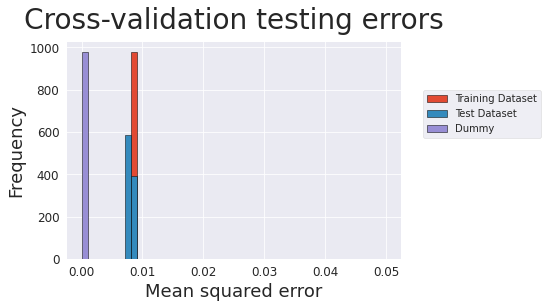

In [52]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.05, num=50)
hist = cv_svr_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [53]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
svr_results = pd.DataFrame(['SVR', svr_time, gsvr_param, optuna_svr_params, svr_train_mae, svr_test_mae, dummy_test_mae, svr_train_mse, svr_test_mse, optuna_svr_mse, dummy_test_mse, svr_train_rmse, svr_test_rmse, optuna_svr_rmse, dummy_test_rmse,  svr_train_r2, svr_test_r2, dummy_test_r2]).transpose()
svr_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results, svr_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177
1,Least Squares Regression,3.142833,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,2.934164,"{'alpha': 0.85, 'learning_rate': 0.8, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.43317191221938517, 'n_estimators': 32, 'max_features': 14, 'alpha': 0.05054916625789371, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.027661998062733284, 'max_depth': 7, 'min_impurity_decrease': 0.9203179251219936, 'validation_fraction': 0.43535466015112234, 'n_iter_no_change': 14, 'tol': 9.226632861628731}",90.193552,125.926398,116.981859,59850.760390,561993.241217,419911.347635,38134.369260,244.644151,749.662085,648.005669,195.280233,0.809483,-0.040617,-0.060177
3,Elastic Net Regression,7.665929,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 399, 'tol': 0.425574963510131, 'alpha': 936.2267528740429, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.9565779460121332}",167.956841,141.057650,116.981859,371160.075674,106128.656085,71288.035719,38134.369260,609.229083,325.773934,266.998194,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,6.469294,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 136, 'tol': 0.4658530831086015, 'alpha': 824.807368309807, 'warm_start': True, 'selection': 'random'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,39123.297842,38134.369260,607.457675,324.615949,197.796102,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.074957,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.06354648761394321, 'max_depth': 15, 'min_impurity_decrease': 0.6473911785704477, 'splitter': 'best', 'min_samples_split': 7}",0.000000,93.673179,116.981859,0.000000,243817.932504,37903.445571,38134.369260,0.000000,493.779235,194.688072,195.280233,1.000000,-5.778405,-0.060177
6,Random Forest,5.015333,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 62, 'max_features': 6, 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.028683301505971787, 'max_depth': 13, 'min_impurity_decrease': 0.05612333190103246, 'min_samples_split': 18, 'max_samples': 49, 'bootstrap': False}",45.062128,81.099858,116.981859,68986.121575,69380.836277,27475.480872,38134.369260,262.652092,263.402423,165.757295,195.280233,0.869832,-0.928863,-0.060177
7,SVR,14.053974,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': False, 'C': 99.27195610823287, 'epsilon': 0.19978876862198675, 'shrinking': True}",104.530854,64.591326,116.981859,466213.610472,27688.119168,26505.080236,38134.369260,682.798367,166.397473,162.803809,195.280233,0.120315,0.230240,-0.060177


# Bagging for Regression

In [54]:
from sklearn.ensemble import BaggingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a RF classifier
reg_bagging = BaggingRegressor() 

# define values for hyperparameters
n_estimators = [200]
max_features = [30]
max_samples = [100]

# Create the random grid
rbag_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_samples':max_samples}

# cross validation to tune hyperparameter
g_rbag = GridSearchCV(reg_bagging, param_grid = rbag_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
reg_bagging.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_reg_bagging_test_pred = reg_bagging.predict(X_test)
y_reg_bagging_train_pred = reg_bagging.predict(X_train)

# fit the grid
g_rbag.fit(X_train, y_train)

# best hyperparameter
g_rbag_param = g_rbag.best_params_

# The mean absolute error
reg_bagging_test_mae = mean_absolute_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mae = mean_absolute_error(y_train, y_reg_bagging_train_pred)

# The mean squared error
reg_bagging_test_mse = mean_squared_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mse = mean_squared_error(y_train, y_reg_bagging_train_pred)

# The coefficient of determination: 1 is perfect prediction
reg_bagging_test_r2 = r2_score(y_test, y_reg_bagging_test_pred)
reg_bagging_train_r2 = r2_score(y_train, y_reg_bagging_train_pred)

# The root mean squared error
reg_bagging_test_rmse = sqrt(mean_squared_error(y_test, y_reg_bagging_test_pred))
reg_bagging_train_rmse = sqrt(mean_squared_error(y_train, y_reg_bagging_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rbagging_time = t1_stop-t1_start

print("Elapsed time in seconds to run Bagging Regressor:", rbagging_time)

Elapsed time in seconds to run Bagging Regressor: 2.7048810640000056


In [55]:
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 200)
    max_features = trial.suggest_int("max_features", 1, 30)
    max_samples = trial.suggest_int("max_samples", 1, 100)
    bootstrap = trial.suggest_categorical("bootstrap",choices=[True, False])
    bootstrap_features = trial.suggest_categorical("bootstrap_features",choices=[True, False])
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    

    ## Create Model
    
    optuna_bagging  = BaggingRegressor(n_estimators=n_estimators, max_features=max_features, max_samples=max_samples, bootstrap=bootstrap, bootstrap_features=bootstrap_features, warm_start=warm_start)
    
    ## Fit Model
    
    optuna_bagging.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_bagging.predict(X_test))
    

t1_start = process_time()


study3 = optuna.create_study(study_name="BaggingRegressor")
study3.optimize(objective, n_trials=47)

# evaluation metrics

optuna_bagging_rmse = sqrt(study3.best_value)
optuna_bagging_mse = study3.best_value
optuna_bagging_params = study3.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
bagging_time = t1_stop-t1_start

print("Elapsed time in seconds to run Bagging Regressor with Optuna tuning hyperparameters:", bagging_time)

print("Best Params : {}".format(optuna_bagging_params))
print("\nBest MSE : {}".format(optuna_bagging_mse))
print("\nBest RMSE : {}".format(optuna_bagging_rmse))


[I 2022-02-01 10:55:21,601] A new study created in memory with name: BaggingRegressor
[I 2022-02-01 10:55:21,664] Trial 0 finished with value: 32765.396125431933 and parameters: {'n_estimators': 28, 'max_features': 17, 'max_samples': 55, 'bootstrap': True, 'bootstrap_features': True, 'warm_start': False}. Best is trial 0 with value: 32765.396125431933.
[I 2022-02-01 10:55:21,806] Trial 1 finished with value: 32727.234102748713 and parameters: {'n_estimators': 70, 'max_features': 14, 'max_samples': 50, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': True}. Best is trial 1 with value: 32727.234102748713.
[I 2022-02-01 10:55:22,092] Trial 2 finished with value: 30249.732866177364 and parameters: {'n_estimators': 143, 'max_features': 19, 'max_samples': 90, 'bootstrap': True, 'bootstrap_features': True, 'warm_start': True}. Best is trial 2 with value: 30249.732866177364.
[I 2022-02-01 10:55:22,177] Trial 3 finished with value: 34543.183041510005 and parameters: {'n_estimators

Elapsed time in seconds to run Bagging Regressor with Optuna tuning hyperparameters: 10.38836366800001
Best Params : {'n_estimators': 111, 'max_features': 22, 'max_samples': 34, 'bootstrap': True, 'bootstrap_features': True, 'warm_start': False}

Best MSE : 25969.783474682354

Best RMSE : 161.15143025949956


In [56]:
# cross validation

cv_bagging_train = cross_val_score(g_rbag, X_train, y_reg_bagging_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_bagging_test = cross_val_score(g_rbag, X_test, y_reg_bagging_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_bagging_results = pd.DataFrame([-cv_bagging_train, -cv_bagging_test, -cv_dummy]).transpose()
cv_bagging_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_bagging_results

,Training Dataset,Test Dataset,Dummy
0,189258.371339,23542.388273,8.077936e-28
1,55940.113513,9478.968260,8.077936e-28
2,360209.525390,18288.314698,8.077936e-28
3,539352.820335,173375.111517,8.077936e-28
4,22125.848813,186709.433801,8.077936e-28


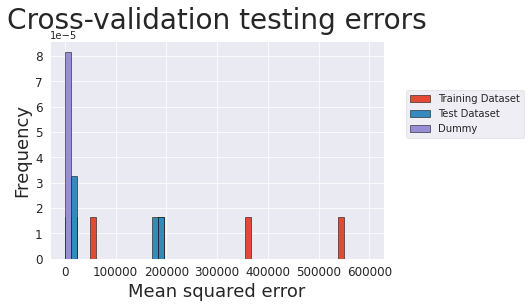

In [57]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=600000, num=50)
hist = cv_bagging_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [58]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
bagging_results = pd.DataFrame(['Bagging Regressor', rbagging_time, g_rbag_param, optuna_bagging_params, reg_bagging_train_mae, reg_bagging_test_mae, dummy_test_mae, reg_bagging_train_mse, reg_bagging_test_mse, optuna_bagging_mse, dummy_test_mse, reg_bagging_train_rmse, reg_bagging_test_rmse, optuna_bagging_rmse, dummy_test_rmse, reg_bagging_train_r2, reg_bagging_test_r2, dummy_test_r2]).transpose()
bagging_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results, svr_results, bagging_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177
1,Least Squares Regression,3.142833,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,2.934164,"{'alpha': 0.85, 'learning_rate': 0.8, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.43317191221938517, 'n_estimators': 32, 'max_features': 14, 'alpha': 0.05054916625789371, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.027661998062733284, 'max_depth': 7, 'min_impurity_decrease': 0.9203179251219936, 'validation_fraction': 0.43535466015112234, 'n_iter_no_change': 14, 'tol': 9.226632861628731}",90.193552,125.926398,116.981859,59850.760390,561993.241217,419911.347635,38134.369260,244.644151,749.662085,648.005669,195.280233,0.809483,-0.040617,-0.060177
3,Elastic Net Regression,7.665929,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 399, 'tol': 0.425574963510131, 'alpha': 936.2267528740429, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.9565779460121332}",167.956841,141.057650,116.981859,371160.075674,106128.656085,71288.035719,38134.369260,609.229083,325.773934,266.998194,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,6.469294,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 136, 'tol': 0.4658530831086015, 'alpha': 824.807368309807, 'warm_start': True, 'selection': 'random'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,39123.297842,38134.369260,607.457675,324.615949,197.796102,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.074957,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.06354648761394321, 'max_depth': 15, 'min_impurity_decrease': 0.6473911785704477, 'splitter': 'best', 'min_samples_split': 7}",0.000000,93.673179,116.981859,0.000000,243817.932504,37903.445571,38134.369260,0.000000,493.779235,194.688072,195.280233,1.000000,-5.778405,-0.060177
6,Random Forest,5.015333,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 62, 'max_features': 6, 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.028683301505971787, 'max_depth': 13, 'min_impurity_decrease': 0.05612333190103246, 'min_samples_split': 18, 'max_samples': 49, 'bootstrap': False}",45.062128,81.099858,116.981859,68986.121575,69380.836277,27475.480872,38134.369260,262.652092,263.402423,165.757295,195.280233,0.869832,-0.928863,-0.060177
7,SVR,14.053974,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': False, 'C': 99.27195610823287, 'epsilon': 0.19978876862198675, 'shrinking': True}",104.530854,64.591326,116.981859,466213.610472,27688.119168,26505.080236,38134.369260,682.798367,166.397473,162.803809,195.280233,0.120315,0.230240,-0.060177
8,Bagging Regressor,2.704881,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}","{'n_estimators': 111, 'max_features': 22, 'max_samples': 34, 'bootstrap': True, 'bootstrap_features': True, 'warm_start': False}",49.267582,88.994316,116.98

# XGBoost

In [59]:
import xgboost as xgb
import xgboost as XGBRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
xg_boosting = xgb.XGBRegressor() 

# define values for hyperparameters
eta = [0.2] 
alpha = [0.7]
gamma = [3]
max_depth = [12]
max_leaves = [4]
min_child_weight = [3]

# Create the random grid
xgboosting_grid = {'eta': eta, 'alpha': alpha, 'gamma': gamma, 'max_depth':max_depth, 'max_leaves':max_leaves, 'min_child_weight':min_child_weight}

# cross validation to tune hyperparameter
g_xg_boosting = GridSearchCV(xg_boosting, param_grid = xgboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
xg_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_xg_boosting_test_pred = xg_boosting.predict(X_test)
y_xg_boosting_train_pred = xg_boosting.predict(X_train)

# fit the grid
g_xg_boosting.fit(X_train, y_train)

# best hyperparameter
g_xgboosting_param = g_xg_boosting.best_params_

# The mean absolute error
xg_boosting_test_mae = mean_absolute_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mae = mean_absolute_error(y_train, y_xg_boosting_train_pred)

# The mean squared error
xg_boosting_test_mse = mean_squared_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mse = mean_squared_error(y_train, y_xg_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
xg_boosting_test_r2 = r2_score(y_test, y_xg_boosting_test_pred)
xg_boosting_train_r2 = r2_score(y_train, y_xg_boosting_train_pred)

# The root mean squared error
xg_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_xg_boosting_test_pred))
xg_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_xg_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
xg_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run XGBoosting Regressor:", xg_boosting_time)

Elapsed time in seconds to run XGBoosting Regressor: 14.49041744600001


In [60]:
import optuna

def objective(trial):
    
    
    colsample_bylevel = trial.suggest_float("colsample_bylevel", 0, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0, 1)
    booster= trial.suggest_categorical("booster",choices=["gbtree", "gblinear"])
    gamma = trial.suggest_float("gamma", 0, 1000)
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    max_delta_step = trial.suggest_float("max_delta_step", 0, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 25)
    min_child_weights = trial.suggest_float("min_child_weights", 0, 100)
    n_estimators = trial.suggest_int("n_estimators", 10, 2000)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 1000)
    reg_lambda = trial.suggest_float("reg_lambda", 0, 1000)
    

    ## Create Model
    
    optuna_xgboost  = xgb.XGBRegressor(n_estimators=n_estimators, reg_alpha=reg_alpha, reg_lambda=reg_lambda, colsample_bylevel=colsample_bylevel, colsample_bytree=colsample_bytree, booster=booster, gamma=gamma, max_depth=max_depth, learning_rate=learning_rate, max_delta_step=max_delta_step, min_child_weights=min_child_weights)
    
    ## Fit Model
    
    optuna_xgboost.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_xgboost.predict(X_test))
    

t1_start = process_time()


study8 = optuna.create_study(study_name="XGBoost")
study8.optimize(objective, n_trials=47)

# evaluation metrics

optuna_xgboost_rmse = sqrt(study8.best_value)
optuna_xgboost_mse = study8.best_value
optuna_xgboost_params = study8.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
xgboost_time = t1_stop-t1_start

print("Elapsed time in seconds to run XGBoost Regressor with Optuna tuning hyperparameters:", xgboost_time)

print("Best Params : {}".format(optuna_xgboost_params))
print("\nBest MSE : {}".format(optuna_xgboost_mse))
print("\nBest RMSE : {}".format(optuna_xgboost_rmse))


[I 2022-02-01 10:56:03,767] A new study created in memory with name: XGBoost


[10:56:03] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:07,926] Trial 0 finished with value: 95818.14559348914 and parameters: {'colsample_bylevel': 0.20153573413977355, 'colsample_bytree': 0.454045742977252, 'booster': 'gbtree', 'gamma': 288.6393180443738, 'learning_rate': 0.5317619485659165, 'max_delta_step': 590.3857608112762, 'max_depth': 3, 'min_child_weights': 92.63272465137166, 'n_estimators': 1603, 'reg_alpha': 719.6883633761328, 'reg_lambda': 623.6844945943002}. Best is trial 0 with value: 95818.14559348914.


[10:56:07] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:12,293] Trial 1 finished with value: 105572.8160253249 and parameters: {'colsample_bylevel': 0.21984014517752404, 'colsample_bytree': 0.9030438095223218, 'booster': 'gblinear', 'gamma': 0.2103241522894983, 'learning_rate': 0.3527375112997162, 'max_delta_step': 600.5802468723389, 'max_depth': 22, 'min_child_weights': 20.60288150080628, 'n_estimators': 1871, 'reg_alpha': 341.5990118741421, 'reg_lambda': 304.682257309422}. Best is trial 0 with value: 95818.14559348914.


[10:56:12] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:14,458] Trial 2 finished with value: 55631.541705479474 and parameters: {'colsample_bylevel': 0.7119486252800004, 'colsample_bytree': 0.10265925606853343, 'booster': 'gbtree', 'gamma': 600.3638642783371, 'learning_rate': 0.798907208009884, 'max_delta_step': 547.127090937154, 'max_depth': 21, 'min_child_weights': 6.258086823023823, 'n_estimators': 786, 'reg_alpha': 876.6113799990708, 'reg_lambda': 900.5209647621786}. Best is trial 2 with value: 55631.541705479474.


[10:56:14] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:18,409] Trial 3 finished with value: 107108.22965624928 and parameters: {'colsample_bylevel': 0.9076892323091104, 'colsample_bytree': 0.2536345540741295, 'booster': 'gblinear', 'gamma': 810.8731778350997, 'learning_rate': 0.4247630432819506, 'max_delta_step': 369.22300044559097, 'max_depth': 9, 'min_child_weights': 74.57342085668445, 'n_estimators': 1673, 'reg_alpha': 897.3494649945385, 'reg_lambda': 728.9566956624724}. Best is trial 2 with value: 55631.541705479474.


[10:56:18] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:19,805] Trial 4 finished with value: 105239.11556540274 and parameters: {'colsample_bylevel': 0.35204266426282915, 'colsample_bytree': 0.2901192835712685, 'booster': 'gblinear', 'gamma': 267.080008379588, 'learning_rate': 0.4902596522339898, 'max_delta_step': 718.484452951887, 'max_depth': 18, 'min_child_weights': 42.18688290082613, 'n_estimators': 588, 'reg_alpha': 384.7632363855442, 'reg_lambda': 36.792848887606475}. Best is trial 2 with value: 55631.541705479474.


[10:56:19] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:24,371] Trial 5 finished with value: 107165.38026766547 and parameters: {'colsample_bylevel': 0.22070768308235467, 'colsample_bytree': 0.45206468684538104, 'booster': 'gblinear', 'gamma': 241.06996243025668, 'learning_rate': 0.5842187669785798, 'max_delta_step': 847.3003813985088, 'max_depth': 8, 'min_child_weights': 70.49742715176632, 'n_estimators': 1604, 'reg_alpha': 929.8544046313984, 'reg_lambda': 733.1932468132308}. Best is trial 2 with value: 55631.541705479474.


[10:56:24] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:27,307] Trial 6 finished with value: 35364.3325394745 and parameters: {'colsample_bylevel': 0.8720284992166404, 'colsample_bytree': 0.7917913930509226, 'booster': 'gbtree', 'gamma': 477.5667408349167, 'learning_rate': 0.8489218186341427, 'max_delta_step': 838.2934141756813, 'max_depth': 20, 'min_child_weights': 71.98158087957076, 'n_estimators': 381, 'reg_alpha': 230.74382203700762, 'reg_lambda': 455.65040745465524}. Best is trial 6 with value: 35364.3325394745.


[10:56:27] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:29,265] Trial 7 finished with value: 106917.10236746166 and parameters: {'colsample_bylevel': 0.14599573654461184, 'colsample_bytree': 0.7295572826266866, 'booster': 'gblinear', 'gamma': 28.264945770857253, 'learning_rate': 0.3383806452620274, 'max_delta_step': 792.2770509255646, 'max_depth': 3, 'min_child_weights': 33.164828424187654, 'n_estimators': 822, 'reg_alpha': 540.0102146653526, 'reg_lambda': 932.5912259693881}. Best is trial 6 with value: 35364.3325394745.


[10:56:29] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:34,476] Trial 8 finished with value: 99587.44048576555 and parameters: {'colsample_bylevel': 0.7754788847600291, 'colsample_bytree': 0.14864922915011025, 'booster': 'gbtree', 'gamma': 664.0507695331147, 'learning_rate': 0.30259589536734977, 'max_delta_step': 157.9649751920338, 'max_depth': 20, 'min_child_weights': 13.567958515160406, 'n_estimators': 1874, 'reg_alpha': 911.5911280909265, 'reg_lambda': 305.55569255668024}. Best is trial 6 with value: 35364.3325394745.


[10:56:34] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:38,172] Trial 9 finished with value: 106147.46645396034 and parameters: {'colsample_bylevel': 0.1849235087223876, 'colsample_bytree': 0.7987258823078227, 'booster': 'gblinear', 'gamma': 278.18943636177784, 'learning_rate': 0.7388646492475385, 'max_delta_step': 971.3370966918858, 'max_depth': 10, 'min_child_weights': 50.08525210489091, 'n_estimators': 1415, 'reg_alpha': 551.6305537332154, 'reg_lambda': 476.19435198400026}. Best is trial 6 with value: 35364.3325394745.


[10:56:38] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:38,548] Trial 10 finished with value: 76335.1156140143 and parameters: {'colsample_bylevel': 0.550511996001556, 'colsample_bytree': 0.6824181335144314, 'booster': 'gbtree', 'gamma': 916.1663422568315, 'learning_rate': 0.993230861881731, 'max_delta_step': 327.057510459239, 'max_depth': 15, 'min_child_weights': 98.79943833674024, 'n_estimators': 52, 'reg_alpha': 9.818437943417734, 'reg_lambda': 30.47959423851887}. Best is trial 6 with value: 35364.3325394745.


[10:56:38] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:39,389] Trial 11 finished with value: 38599.71501361441 and parameters: {'colsample_bylevel': 0.6672113713179741, 'colsample_bytree': 0.03734098273414316, 'booster': 'gbtree', 'gamma': 557.0031799116965, 'learning_rate': 0.8920219932996939, 'max_delta_step': 4.793278146954378, 'max_depth': 23, 'min_child_weights': 1.428737940293316, 'n_estimators': 317, 'reg_alpha': 122.29171074945674, 'reg_lambda': 988.4708739107978}. Best is trial 6 with value: 35364.3325394745.


[10:56:39] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:40,630] Trial 12 finished with value: 25703.569278824933 and parameters: {'colsample_bylevel': 0.9772431016855487, 'colsample_bytree': 0.5589837793538217, 'booster': 'gbtree', 'gamma': 495.14834123898214, 'learning_rate': 0.9844575369727453, 'max_delta_step': 5.971856195899591, 'max_depth': 23, 'min_child_weights': 62.31319351887542, 'n_estimators': 207, 'reg_alpha': 86.61802477498378, 'reg_lambda': 416.1904805494637}. Best is trial 12 with value: 25703.569278824933.


[10:56:40] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:40,936] Trial 13 finished with value: 32652.84096457057 and parameters: {'colsample_bylevel': 0.9699659647399856, 'colsample_bytree': 0.5962977117028305, 'booster': 'gbtree', 'gamma': 433.7472112405742, 'learning_rate': 0.9919933113661574, 'max_delta_step': 353.38330835911427, 'max_depth': 16, 'min_child_weights': 65.56057171013202, 'n_estimators': 40, 'reg_alpha': 197.7254503874853, 'reg_lambda': 402.3001062875283}. Best is trial 12 with value: 25703.569278824933.
[I 2022-02-01 10:56:41,070] Trial 14 finished with value: 42372.007716529755 and parameters: {'colsample_bylevel': 0.9347185249326017, 'colsample_bytree': 0.6504022775883928, 'booster': 'gbtree', 'gamma': 443.10245606042616, 'learning_rate': 0.049194195606885205, 'max_delta_step': 6.984904009103616, 'max_depth': 25, 'min_child_weights': 55.75118041172291, 'n_estimators': 28, 'reg_alpha': 23.637423832885958, 'reg_lambda': 246.19351736364274}. Best is trial 12 with value: 25703.569278824933.


[10:56:40] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[10:56:41] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:47,798] Trial 15 finished with value: 97123.78901536779 and parameters: {'colsample_bylevel': 0.997287412384191, 'colsample_bytree': 0.5661285847268658, 'booster': 'gbtree', 'gamma': 734.406370481839, 'learning_rate': 0.9845790631062051, 'max_delta_step': 236.6105800311555, 'max_depth': 15, 'min_child_weights': 61.23021755480939, 'n_estimators': 1225, 'reg_alpha': 215.22559443241852, 'reg_lambda': 197.15270844318658}. Best is trial 12 with value: 25703.569278824933.


[10:56:47] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:48,893] Trial 16 finished with value: 62526.74145311801 and parameters: {'colsample_bylevel': 0.5349880327156464, 'colsample_bytree': 0.3521302103775499, 'booster': 'gbtree', 'gamma': 392.04456646574465, 'learning_rate': 0.6981811016911144, 'max_delta_step': 400.2370954096827, 'max_depth': 12, 'min_child_weights': 84.19237704639063, 'n_estimators': 289, 'reg_alpha': 192.0574856167197, 'reg_lambda': 390.15652178476506}. Best is trial 12 with value: 25703.569278824933.


[10:56:48] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:52,914] Trial 17 finished with value: 22613.174479973793 and parameters: {'colsample_bylevel': 0.7964199281711057, 'colsample_bytree': 0.9658533400810161, 'booster': 'gbtree', 'gamma': 409.6184782218716, 'learning_rate': 0.6544905882748651, 'max_delta_step': 149.0384652587641, 'max_depth': 17, 'min_child_weights': 65.08276406468283, 'n_estimators': 568, 'reg_alpha': 352.6067852760795, 'reg_lambda': 588.3334230616928}. Best is trial 17 with value: 22613.174479973793.


[10:56:52] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:56:58,341] Trial 18 finished with value: 20678.24270803378 and parameters: {'colsample_bylevel': 0.8029478996933394, 'colsample_bytree': 0.9456207214930358, 'booster': 'gbtree', 'gamma': 645.1397805876089, 'learning_rate': 0.16942654709288169, 'max_delta_step': 118.2913926208909, 'max_depth': 25, 'min_child_weights': 34.61769753800077, 'n_estimators': 568, 'reg_alpha': 410.11165975404526, 'reg_lambda': 590.5818441970565}. Best is trial 18 with value: 20678.24270803378.


[10:56:58] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:04,157] Trial 19 finished with value: 21082.68928834783 and parameters: {'colsample_bylevel': 0.40285400456712855, 'colsample_bytree': 0.9730474294673637, 'booster': 'gbtree', 'gamma': 145.89448996372295, 'learning_rate': 0.11432024650493186, 'max_delta_step': 141.8303168907222, 'max_depth': 25, 'min_child_weights': 39.13681989363525, 'n_estimators': 1071, 'reg_alpha': 432.7675706790361, 'reg_lambda': 602.2302431028402}. Best is trial 18 with value: 20678.24270803378.


[10:57:04] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:10,162] Trial 20 finished with value: 20236.15019529377 and parameters: {'colsample_bylevel': 0.4231724195216683, 'colsample_bytree': 0.9943603271801141, 'booster': 'gbtree', 'gamma': 950.0944236359335, 'learning_rate': 0.06794764952025743, 'max_delta_step': 142.7818396426501, 'max_depth': 25, 'min_child_weights': 29.81421614450081, 'n_estimators': 1109, 'reg_alpha': 624.7575670609049, 'reg_lambda': 763.2016025584048}. Best is trial 20 with value: 20236.15019529377.


[10:57:10] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:15,640] Trial 21 finished with value: 21583.99946412595 and parameters: {'colsample_bylevel': 0.3894330954821633, 'colsample_bytree': 0.9987865303331626, 'booster': 'gbtree', 'gamma': 993.4924526540647, 'learning_rate': 0.05329963871634222, 'max_delta_step': 138.7240573267783, 'max_depth': 25, 'min_child_weights': 30.234219961793794, 'n_estimators': 1027, 'reg_alpha': 659.4124210182478, 'reg_lambda': 774.0713450064733}. Best is trial 20 with value: 20236.15019529377.


[10:57:15] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:21,386] Trial 22 finished with value: 26588.915089606027 and parameters: {'colsample_bylevel': 0.39437336593749445, 'colsample_bytree': 0.8659261355517132, 'booster': 'gbtree', 'gamma': 122.81107936303829, 'learning_rate': 0.16837860763231566, 'max_delta_step': 206.13637752121093, 'max_depth': 25, 'min_child_weights': 37.5337916992302, 'n_estimators': 1141, 'reg_alpha': 466.01032539601647, 'reg_lambda': 582.5284903847246}. Best is trial 20 with value: 20236.15019529377.


[10:57:21] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:23,690] Trial 23 finished with value: 34374.220454087495 and parameters: {'colsample_bylevel': 0.016095579764456247, 'colsample_bytree': 0.9029889486727952, 'booster': 'gbtree', 'gamma': 842.3562637456923, 'learning_rate': 0.1843455148931896, 'max_delta_step': 273.0130156305378, 'max_depth': 19, 'min_child_weights': 24.77857596288157, 'n_estimators': 860, 'reg_alpha': 661.996296216283, 'reg_lambda': 794.3327111802132}. Best is trial 20 with value: 20236.15019529377.


[10:57:23] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:31,547] Trial 24 finished with value: 27729.73137692887 and parameters: {'colsample_bylevel': 0.4815784513534464, 'colsample_bytree': 0.8171953804525383, 'booster': 'gbtree', 'gamma': 691.8222404119699, 'learning_rate': 0.1841003458029199, 'max_delta_step': 91.28811108417942, 'max_depth': 23, 'min_child_weights': 43.54940893051476, 'n_estimators': 1255, 'reg_alpha': 458.9346548546655, 'reg_lambda': 666.2598023982991}. Best is trial 20 with value: 20236.15019529377.


[10:57:31] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:35,445] Trial 25 finished with value: 20511.85653889822 and parameters: {'colsample_bylevel': 0.6198296120624937, 'colsample_bytree': 0.9950766310064545, 'booster': 'gbtree', 'gamma': 990.6258864265184, 'learning_rate': 0.11558092197119503, 'max_delta_step': 488.0779433720527, 'max_depth': 25, 'min_child_weights': 16.63761818891971, 'n_estimators': 633, 'reg_alpha': 793.744750951736, 'reg_lambda': 517.9973930471764}. Best is trial 20 with value: 20236.15019529377.


[10:57:35] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:37,799] Trial 26 finished with value: 22163.04438098503 and parameters: {'colsample_bylevel': 0.6946555147689903, 'colsample_bytree': 0.9093687598943744, 'booster': 'gbtree', 'gamma': 994.7223485640039, 'learning_rate': 0.2593821233616497, 'max_delta_step': 491.376344863786, 'max_depth': 6, 'min_child_weights': 17.31373706988374, 'n_estimators': 617, 'reg_alpha': 806.6073084027589, 'reg_lambda': 531.4931377267255}. Best is trial 20 with value: 20236.15019529377.


[10:57:37] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:40,026] Trial 27 finished with value: 26421.033637622062 and parameters: {'colsample_bylevel': 0.6217141039375526, 'colsample_bytree': 0.7405041612298555, 'booster': 'gbtree', 'gamma': 879.0281760617484, 'learning_rate': 0.021480954978326028, 'max_delta_step': 438.83666622471077, 'max_depth': 22, 'min_child_weights': 10.71618688216953, 'n_estimators': 456, 'reg_alpha': 793.5004480083396, 'reg_lambda': 838.3583620535925}. Best is trial 20 with value: 20236.15019529377.


[10:57:40] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:44,585] Trial 28 finished with value: 20957.768597419617 and parameters: {'colsample_bylevel': 0.5861978352944084, 'colsample_bytree': 0.9944723067069802, 'booster': 'gbtree', 'gamma': 774.9725989932837, 'learning_rate': 0.11801216333787069, 'max_delta_step': 685.4163042648165, 'max_depth': 23, 'min_child_weights': 28.66560471755695, 'n_estimators': 719, 'reg_alpha': 597.4374423907075, 'reg_lambda': 681.193137378065}. Best is trial 20 with value: 20236.15019529377.


[10:57:44] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:48,610] Trial 29 finished with value: 26813.691689573705 and parameters: {'colsample_bylevel': 0.48585494825225817, 'colsample_bytree': 0.8318204914670075, 'booster': 'gbtree', 'gamma': 937.0498671825404, 'learning_rate': 0.005688636021212945, 'max_delta_step': 291.86039116438707, 'max_depth': 13, 'min_child_weights': 48.47478874565599, 'n_estimators': 889, 'reg_alpha': 745.2719695749495, 'reg_lambda': 550.4601317054388}. Best is trial 20 with value: 20236.15019529377.


[10:57:48] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:57:56,521] Trial 30 finished with value: 25532.486421059515 and parameters: {'colsample_bylevel': 0.8404178749110588, 'colsample_bytree': 0.9014143491722084, 'booster': 'gbtree', 'gamma': 619.9240817568786, 'learning_rate': 0.23525880477222838, 'max_delta_step': 80.24093428465994, 'max_depth': 19, 'min_child_weights': 22.723719125245914, 'n_estimators': 1457, 'reg_alpha': 982.9744927212168, 'reg_lambda': 645.0373915360437}. Best is trial 20 with value: 20236.15019529377.


[10:57:56] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:02,044] Trial 31 finished with value: 20181.482892763503 and parameters: {'colsample_bylevel': 0.6135097507946222, 'colsample_bytree': 0.9877125240042877, 'booster': 'gbtree', 'gamma': 792.170563418961, 'learning_rate': 0.11562985725320839, 'max_delta_step': 658.7562365181898, 'max_depth': 24, 'min_child_weights': 29.52979134930321, 'n_estimators': 711, 'reg_alpha': 600.170605424837, 'reg_lambda': 643.2335502438327}. Best is trial 31 with value: 20181.482892763503.


[10:58:02] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:08,672] Trial 32 finished with value: 20801.095819717728 and parameters: {'colsample_bylevel': 0.7377066525120903, 'colsample_bytree': 0.936656838267035, 'booster': 'gbtree', 'gamma': 778.9483083670975, 'learning_rate': 0.11106287823683134, 'max_delta_step': 631.8485601699603, 'max_depth': 24, 'min_child_weights': 34.35361507198745, 'n_estimators': 949, 'reg_alpha': 653.6877242354486, 'reg_lambda': 844.5470538868981}. Best is trial 31 with value: 20181.482892763503.


[10:58:08] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:12,476] Trial 33 finished with value: 27537.047000241357 and parameters: {'colsample_bylevel': 0.64232017468775, 'colsample_bytree': 0.8552131840528193, 'booster': 'gbtree', 'gamma': 880.4475084292397, 'learning_rate': 0.3971273599739043, 'max_delta_step': 533.2948879121014, 'max_depth': 21, 'min_child_weights': 17.087364565862664, 'n_estimators': 702, 'reg_alpha': 741.1572219392505, 'reg_lambda': 508.669450236094}. Best is trial 31 with value: 20181.482892763503.


[10:58:12] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:13,629] Trial 34 finished with value: 106628.98350055373 and parameters: {'colsample_bylevel': 0.45765472749438557, 'colsample_bytree': 0.9489119716976914, 'booster': 'gblinear', 'gamma': 933.5548537503275, 'learning_rate': 0.2294885304778189, 'max_delta_step': 630.6365692600365, 'max_depth': 21, 'min_child_weights': 26.000663866798135, 'n_estimators': 468, 'reg_alpha': 600.8114410264252, 'reg_lambda': 699.2011285403426}. Best is trial 31 with value: 20181.482892763503.


[10:58:13] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:18,119] Trial 35 finished with value: 19196.82761654859 and parameters: {'colsample_bylevel': 0.5884929662270814, 'colsample_bytree': 0.8767274116960052, 'booster': 'gbtree', 'gamma': 834.3534499051507, 'learning_rate': 0.11332735840354813, 'max_delta_step': 471.7940955117448, 'max_depth': 22, 'min_child_weights': 7.296418571918512, 'n_estimators': 720, 'reg_alpha': 524.3256343966956, 'reg_lambda': 759.8951396661394}. Best is trial 35 with value: 19196.82761654859.


[10:58:18] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:20,143] Trial 36 finished with value: 106618.46800790298 and parameters: {'colsample_bylevel': 0.2880282151947652, 'colsample_bytree': 0.7520963492832475, 'booster': 'gblinear', 'gamma': 843.8544069426054, 'learning_rate': 0.07484549380285234, 'max_delta_step': 467.74108260407803, 'max_depth': 22, 'min_child_weights': 4.95534851594377, 'n_estimators': 758, 'reg_alpha': 524.1098819428496, 'reg_lambda': 753.5446364281079}. Best is trial 35 with value: 19196.82761654859.


[10:58:20] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:24,005] Trial 37 finished with value: 69681.3333489795 and parameters: {'colsample_bylevel': 0.5592279461756448, 'colsample_bytree': 0.4509743241130041, 'booster': 'gbtree', 'gamma': 722.8174397793325, 'learning_rate': 0.49839122964375404, 'max_delta_step': 573.5411834324067, 'max_depth': 24, 'min_child_weights': 8.790304908929308, 'n_estimators': 983, 'reg_alpha': 810.0695100407693, 'reg_lambda': 842.0841059444887}. Best is trial 35 with value: 19196.82761654859.


[10:58:24] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:32,824] Trial 38 finished with value: 30936.619019488717 and parameters: {'colsample_bylevel': 0.44551231035429556, 'colsample_bytree': 0.8637781159976987, 'booster': 'gbtree', 'gamma': 999.4036672185248, 'learning_rate': 0.3905788908251926, 'max_delta_step': 747.0610408099894, 'max_depth': 18, 'min_child_weights': 0.7093452192736445, 'n_estimators': 1726, 'reg_alpha': 710.4478419896861, 'reg_lambda': 916.6149080203195}. Best is trial 35 with value: 19196.82761654859.


[10:58:32] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:34,458] Trial 39 finished with value: 106293.88412469113 and parameters: {'colsample_bylevel': 0.3324067632526274, 'colsample_bytree': 0.8960066532732495, 'booster': 'gblinear', 'gamma': 830.4967131502726, 'learning_rate': 0.26699619706143396, 'max_delta_step': 407.60215623984305, 'max_depth': 22, 'min_child_weights': 19.110381147085096, 'n_estimators': 678, 'reg_alpha': 299.3297127888121, 'reg_lambda': 724.2516025436419}. Best is trial 35 with value: 19196.82761654859.


[10:58:34] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:38,079] Trial 40 finished with value: 89591.05019303448 and parameters: {'colsample_bylevel': 0.7300882933101056, 'colsample_bytree': 0.9985496790048837, 'booster': 'gbtree', 'gamma': 904.1954516565349, 'learning_rate': 0.3264465387054677, 'max_delta_step': 965.1198716816325, 'max_depth': 1, 'min_child_weights': 12.145100928756472, 'n_estimators': 1339, 'reg_alpha': 853.124536534005, 'reg_lambda': 800.8528249861372}. Best is trial 35 with value: 19196.82761654859.


[10:58:38] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:41,345] Trial 41 finished with value: 20594.26116108019 and parameters: {'colsample_bylevel': 0.6054232014527847, 'colsample_bytree': 0.944208165743532, 'booster': 'gbtree', 'gamma': 634.9134488926327, 'learning_rate': 0.1444127397703215, 'max_delta_step': 540.1700831250656, 'max_depth': 24, 'min_child_weights': 22.180039129914473, 'n_estimators': 485, 'reg_alpha': 394.4803492271532, 'reg_lambda': 631.7172700336927}. Best is trial 35 with value: 19196.82761654859.


[10:58:41] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:44,215] Trial 42 finished with value: 20548.16173847707 and parameters: {'colsample_bylevel': 0.5988532918336745, 'colsample_bytree': 0.7907904442625289, 'booster': 'gbtree', 'gamma': 781.6061427381692, 'learning_rate': 0.09683684390228829, 'max_delta_step': 517.1996367923422, 'max_depth': 24, 'min_child_weights': 21.73710050291977, 'n_estimators': 505, 'reg_alpha': 603.1394822488328, 'reg_lambda': 627.9598637686694}. Best is trial 35 with value: 19196.82761654859.


[10:58:44] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:48,652] Trial 43 finished with value: 21743.6402262577 and parameters: {'colsample_bylevel': 0.5319950245342763, 'colsample_bytree': 0.7788770938761512, 'booster': 'gbtree', 'gamma': 785.0023648295589, 'learning_rate': 0.08360560756770787, 'max_delta_step': 632.9037054184457, 'max_depth': 20, 'min_child_weights': 14.986116197404659, 'n_estimators': 824, 'reg_alpha': 608.1113204896218, 'reg_lambda': 651.1487610384148}. Best is trial 35 with value: 19196.82761654859.


[10:58:48] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:49,824] Trial 44 finished with value: 23153.646473699664 and parameters: {'colsample_bylevel': 0.6876174502966965, 'colsample_bytree': 0.6876687229271696, 'booster': 'gbtree', 'gamma': 945.3290362015484, 'learning_rate': 0.21793895564988353, 'max_delta_step': 668.1668821142306, 'max_depth': 21, 'min_child_weights': 5.691366222374399, 'n_estimators': 157, 'reg_alpha': 564.7082836589376, 'reg_lambda': 452.44961961080634}. Best is trial 35 with value: 19196.82761654859.


[10:58:49] WARNING: ../src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "gamma", "max_delta_step", "max_depth", "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:50,790] Trial 45 finished with value: 66372.78120113973 and parameters: {'colsample_bylevel': 0.6378701657206933, 'colsample_bytree': 0.8332248245189225, 'booster': 'gblinear', 'gamma': 543.8779867706716, 'learning_rate': 0.008783671402207607, 'max_delta_step': 578.9625860706385, 'max_depth': 23, 'min_child_weights': 30.82932435668983, 'n_estimators': 379, 'reg_alpha': 483.2325642258936, 'reg_lambda': 717.5986324947976}. Best is trial 35 with value: 19196.82761654859.


[10:58:50] WARNING: ../src/learner.cc:576: 
Parameters: { "min_child_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-02-01 10:58:56,116] Trial 46 finished with value: 23927.06856943365 and parameters: {'colsample_bylevel': 0.5940970043414902, 'colsample_bytree': 0.8826552511006551, 'booster': 'gbtree', 'gamma': 811.3406813977672, 'learning_rate': 0.08848272343927129, 'max_delta_step': 756.3006502329197, 'max_depth': 24, 'min_child_weights': 44.99036367122398, 'n_estimators': 929, 'reg_alpha': 700.9143301693152, 'reg_lambda': 334.25897116428104}. Best is trial 35 with value: 19196.82761654859.


Elapsed time in seconds to run XGBoost Regressor with Optuna tuning hyperparameters: 634.473619549
Best Params : {'colsample_bylevel': 0.5884929662270814, 'colsample_bytree': 0.8767274116960052, 'booster': 'gbtree', 'gamma': 834.3534499051507, 'learning_rate': 0.11332735840354813, 'max_delta_step': 471.7940955117448, 'max_depth': 22, 'min_child_weights': 7.296418571918512, 'n_estimators': 720, 'reg_alpha': 524.3256343966956, 'reg_lambda': 759.8951396661394}

Best MSE : 19196.82761654859

Best RMSE : 138.55261677986667


In [61]:
# cross validation

cv_xg_boosting_train = cross_val_score(g_xg_boosting, X_train, y_xg_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_xg_boosting_test = cross_val_score(g_xg_boosting, X_test, y_xg_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_xg_boosting_results = pd.DataFrame([-cv_xg_boosting_train, -cv_xg_boosting_test, -cv_dummy]).transpose()
cv_xg_boosting_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_xg_boosting_results

,Training Dataset,Test Dataset,Dummy
0,3.167707e+05,68816.945312,8.077936e-28
1,1.560908e+06,3836.258057,8.077936e-28
2,6.809251e+05,3110.802002,8.077936e-28
3,4.845403e+05,211744.921875,8.077936e-28
4,1.405836e+05,104141.921875,8.077936e-28


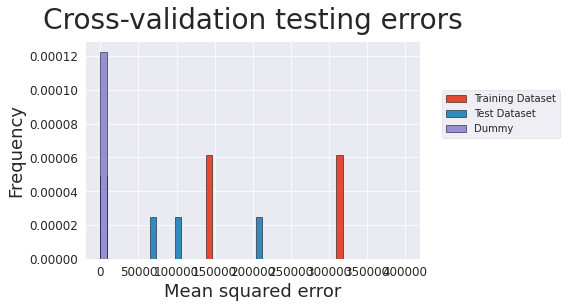

In [62]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=400000, num=50)
hist = cv_xg_boosting_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [63]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
xg_boosting_results = pd.DataFrame(['XGBoost', xg_boosting_time, g_xgboosting_param, optuna_xgboost_params, xg_boosting_train_mae, xg_boosting_test_mae, dummy_test_mae, xg_boosting_train_mse, xg_boosting_test_mse, optuna_xgboost_mse, dummy_test_mse, xg_boosting_train_rmse, xg_boosting_test_rmse, optuna_xgboost_rmse, dummy_test_rmse, xg_boosting_train_r2, xg_boosting_test_r2, dummy_test_r2]).transpose()
xg_boosting_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results, svr_results, bagging_results, xg_boosting_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,6.407032,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 147, 'tol': 0.4107768442903579, 'alpha': 470.7717430611858, 'solver': 'saga'}",183.402521,158.562768,116.981859,364656.522834,91017.258910,40048.360003,38134.369260,603.867968,301.690668,200.120863,195.280233,0.306993,-1.034494,-0.060177
1,Least Squares Regression,3.142833,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,2.934164,"{'alpha': 0.85, 'learning_rate': 0.8, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.43317191221938517, 'n_estimators': 32, 'max_features': 14, 'alpha': 0.05054916625789371, 'max_leaf_nodes': 16, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.027661998062733284, 'max_depth': 7, 'min_impurity_decrease': 0.9203179251219936, 'validation_fraction': 0.43535466015112234, 'n_iter_no_change': 14, 'tol': 9.226632861628731}",90.193552,125.926398,116.981859,59850.760390,561993.241217,419911.347635,38134.369260,244.644151,749.662085,648.005669,195.280233,0.809483,-0.040617,-0.060177
3,Elastic Net Regression,7.665929,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 399, 'tol': 0.425574963510131, 'alpha': 936.2267528740429, 'warm_start': True, 'selection': 'random', 'l1_ratio': 0.9565779460121332}",167.956841,141.057650,116.981859,371160.075674,106128.656085,71288.035719,38134.369260,609.229083,325.773934,266.998194,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,6.469294,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 136, 'tol': 0.4658530831086015, 'alpha': 824.807368309807, 'warm_start': True, 'selection': 'random'}",183.917148,151.823675,116.981859,369004.826975,105375.514579,39123.297842,38134.369260,607.457675,324.615949,197.796102,195.280233,0.303736,-1.929554,-0.060177
5,Decision Trees Regressor,0.074957,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 7, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.06354648761394321, 'max_depth': 15, 'min_impurity_decrease': 0.6473911785704477, 'splitter': 'best', 'min_samples_split': 7}",0.000000,93.673179,116.981859,0.000000,243817.932504,37903.445571,38134.369260,0.000000,493.779235,194.688072,195.280233,1.000000,-5.778405,-0.060177
6,Random Forest,5.015333,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 62, 'max_features': 6, 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.028683301505971787, 'max_depth': 13, 'min_impurity_decrease': 0.05612333190103246, 'min_samples_split': 18, 'max_samples': 49, 'bootstrap': False}",45.062128,81.099858,116.981859,68986.121575,69380.836277,27475.480872,38134.369260,262.652092,263.402423,165.757295,195.280233,0.869832,-0.928863,-0.060177
7,SVR,14.053974,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': False, 'C': 99.27195610823287, 'epsilon': 0.19978876862198675, 'shrinking': True}",104.530854,64.591326,116.981859,466213.610472,27688.119168,26505.080236,38134.369260,682.798367,166.397473,162.803809,195.280233,0.120315,0.230240,-0.060177
8,Bagging Regressor,2.704881,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}","{'n_estimators': 111, 'max_features': 22, 'max_samples': 34, 'bootstrap': True, 'bootstrap_features': True, 'warm_start': False}",49.267582,88.994316,116.98

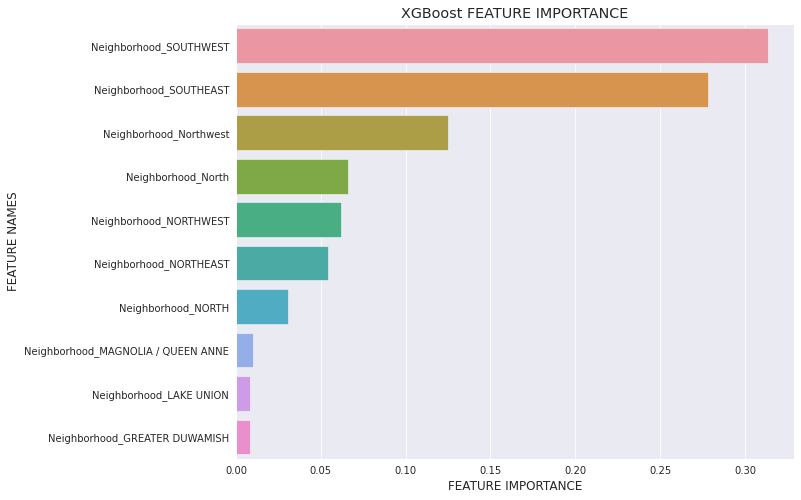

In [64]:
# features importance for random forest
plt.style.use('ggplot')
sns.set_style('darkgrid')
plot_feature_importance(xg_boosting.feature_importances_,X.columns,'XGBoost')
plt.savefig('xgboostfeatures.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Statistical Results

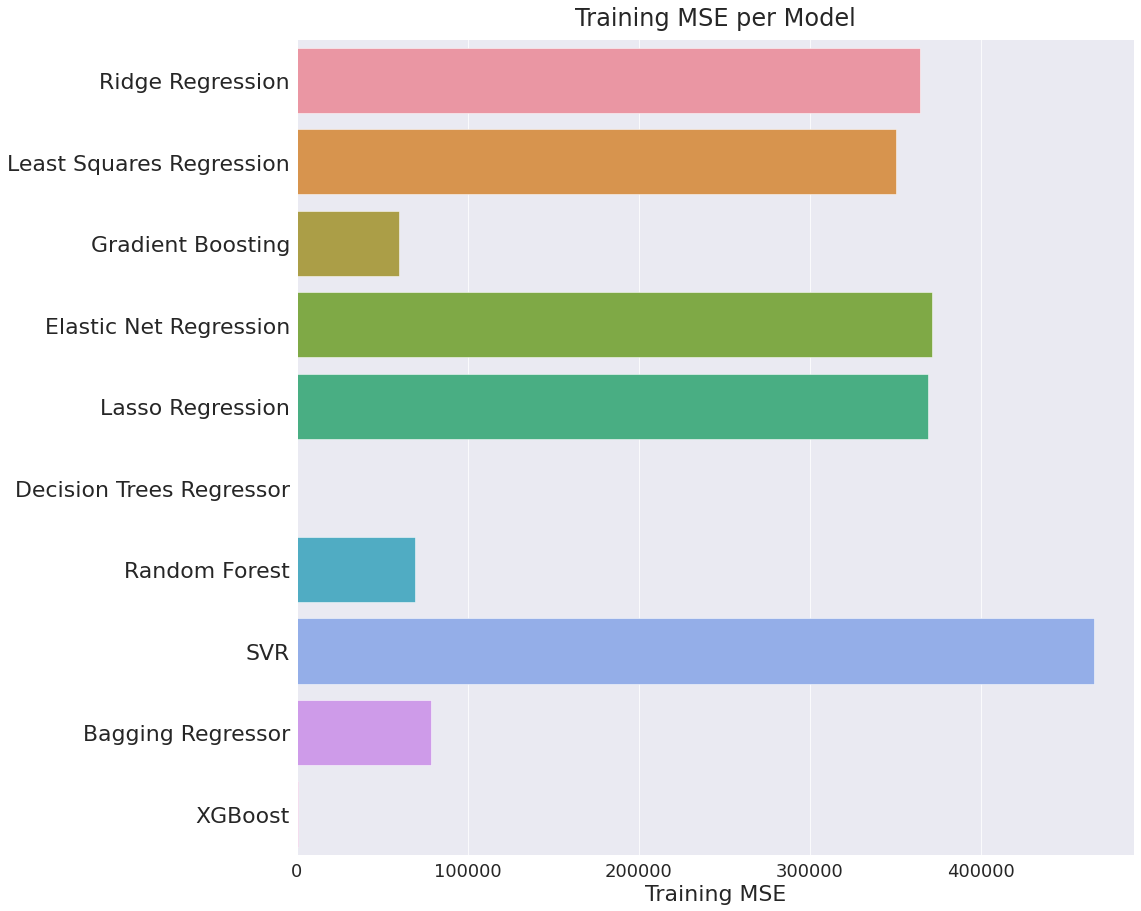

In [65]:
# Training MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training MSE per Model", size=24, y=1.01)
plt.xlabel("Training MSE", size=22)
plt.savefig('msetrain.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

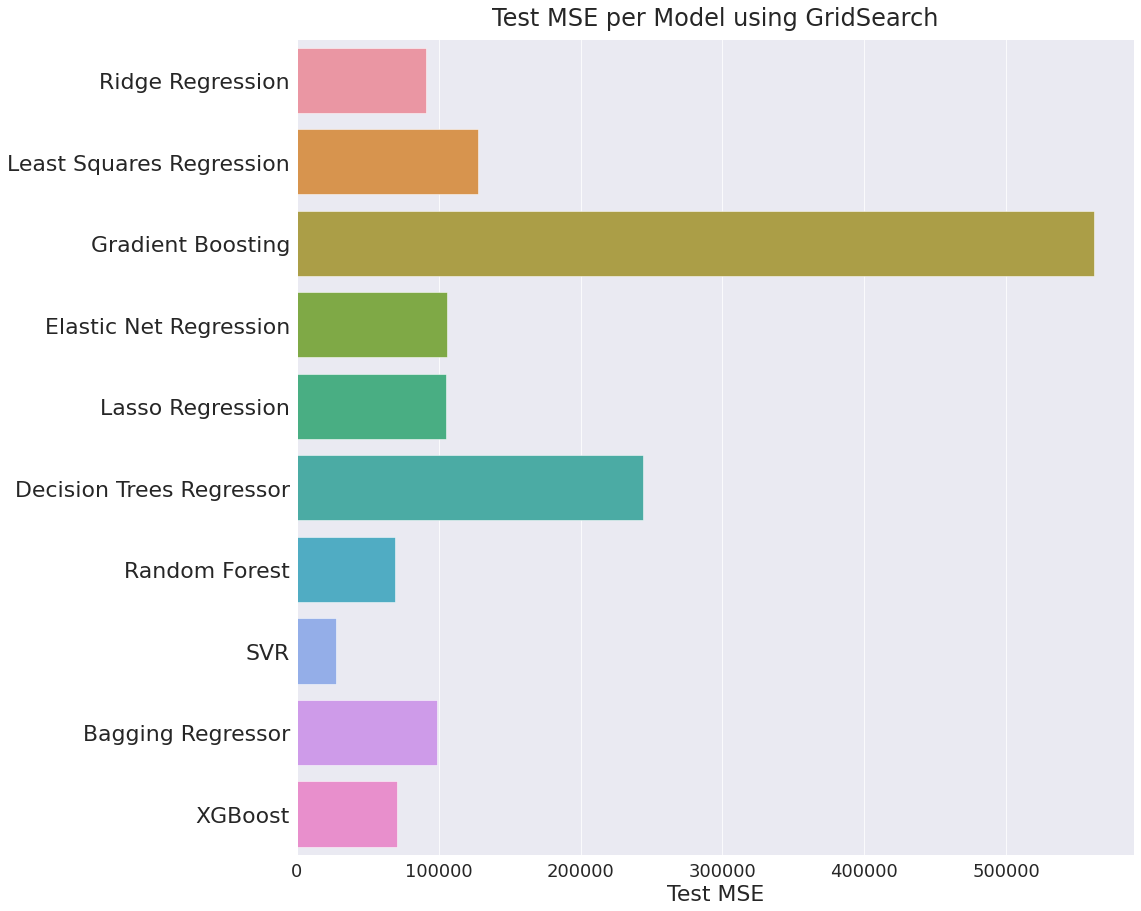

In [66]:
# Test MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MSE per Model using GridSearch", size=24, y=1.01)
plt.xlabel("Test MSE", size=22)
plt.savefig('msetestgrid.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

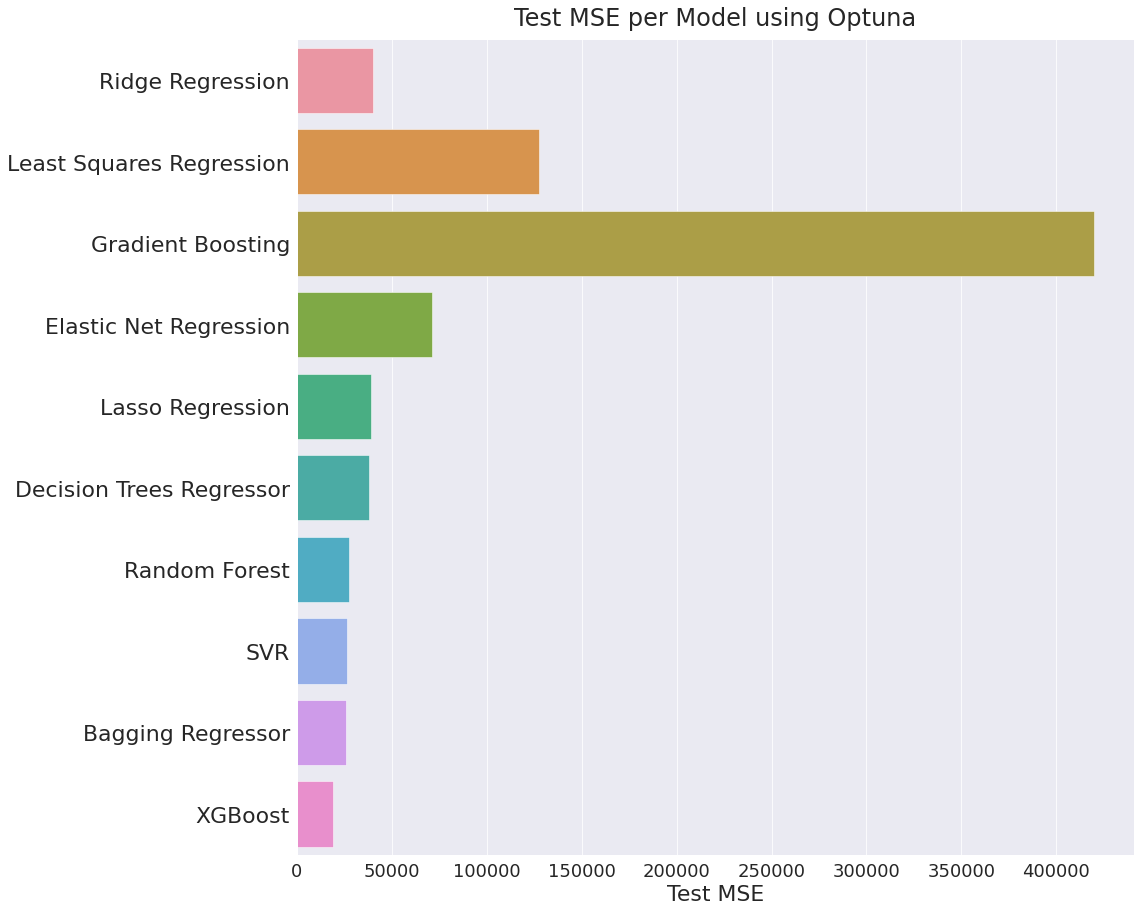

In [67]:
# Test MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Optuna Test MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MSE per Model using Optuna", size=24, y=1.01)
plt.xlabel("Test MSE", size=22)
plt.savefig('msetestoptuna.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

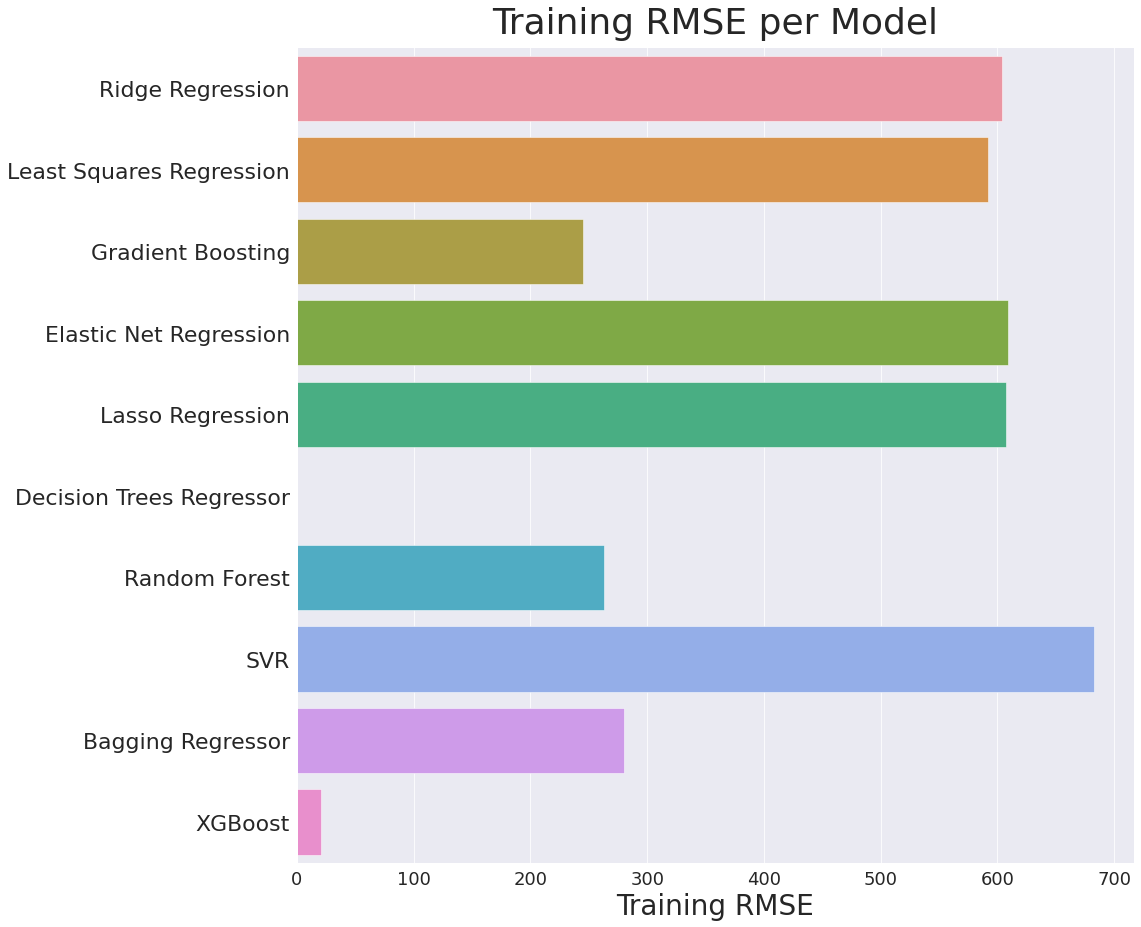

In [68]:
# Training RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training RMSE per Model", size=36, y=1.01)
plt.xlabel("Training RMSE", size=28)
plt.savefig('rmsetrain.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

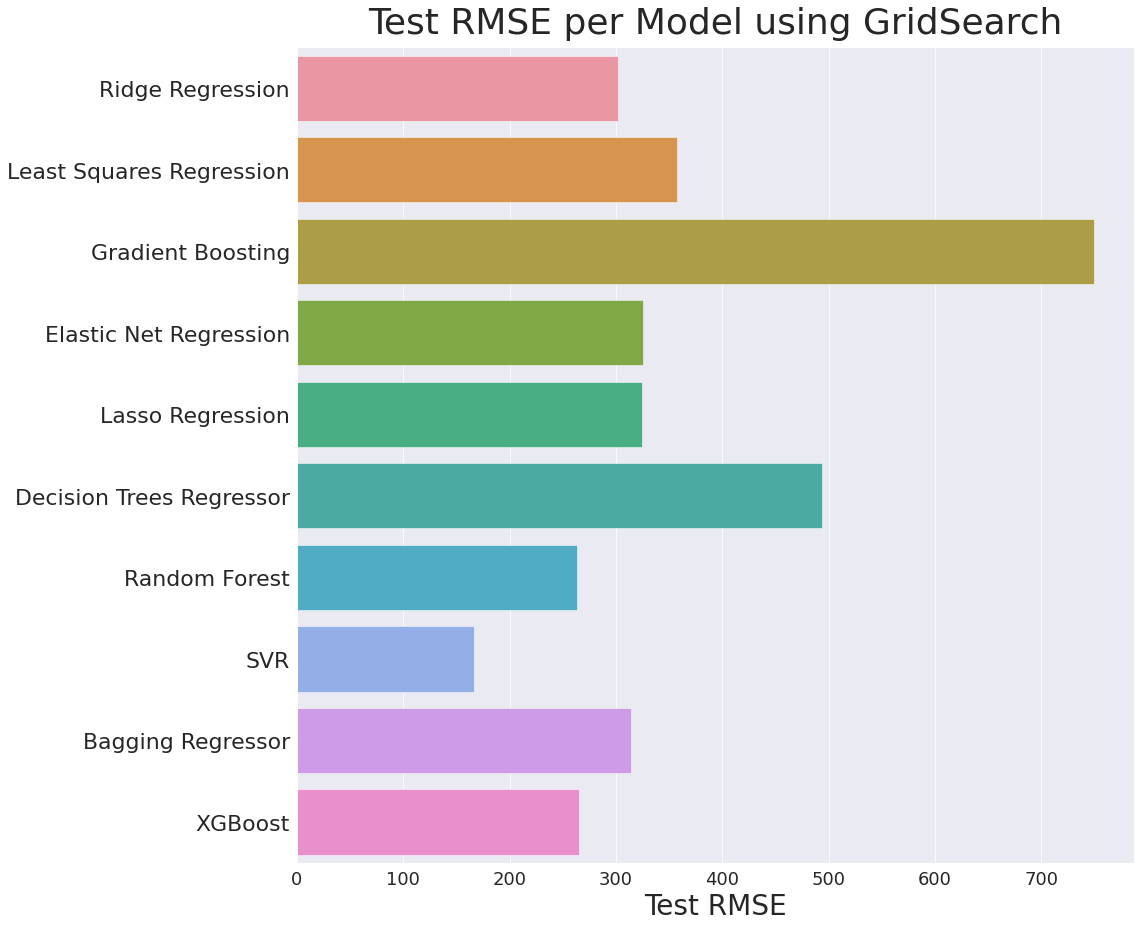

In [69]:
# Test RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test RMSE per Model using GridSearch", size=36, y=1.01)
plt.xlabel("Test RMSE", size=28)
plt.savefig('rmsetestgrid.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

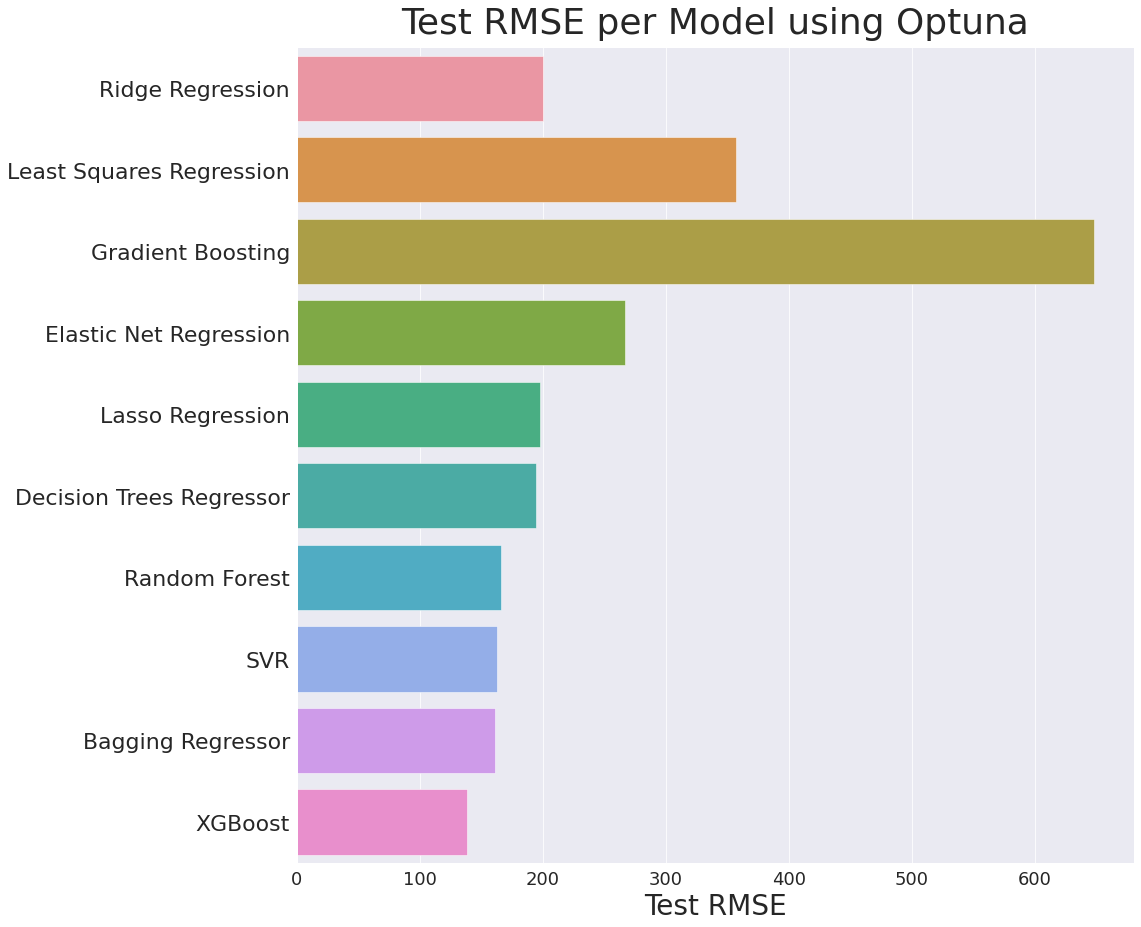

In [70]:
# Test RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Optuna Test RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test RMSE per Model using Optuna", size=36, y=1.01)
plt.xlabel("Test RMSE", size=28)
plt.savefig('rmsetestoptuna.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Final Model Decision

The **XGBoost model** returns us with the best accuracy on the Test Set using Optuna hyperparameter based on MSE and RMSE metrics. We use a the feature importance attribute to notice the importance of the *ENERGYSTARScore* and we can see that the variable scores far from the top 10 variables which make it not important in the decision of the model design. 